In [1]:
import os

data_dir = 'jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [2]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [3]:
print(float_data[0][0])

996.52


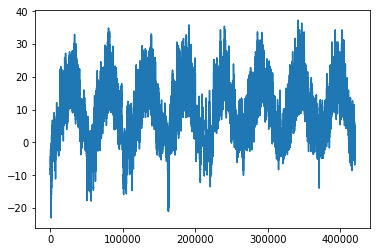

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

temp = float_data[:, 1] #<1> temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)

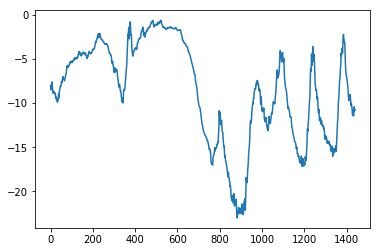

In [5]:
plt.plot(range(1440), temp[:1440])

In [3]:
mean = float_data[:200000].mean(axis = 0)
float_data -= mean
std = float_data[:200000].std(axis = 0)
float_data /= std


In [4]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [5]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size)

val_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=200001, 
                    max_index=300000, 
                    step=step, 
                    batch_size=batch_size)

test_gen = generator(float_data, 
                     lookback=lookback, 
                     delay=delay, 
                     min_index=300001, 
                     max_index=None, 
                     step=step, 
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)


In [9]:
def evaluate_naive_method():
    batch_maes = []
    for i, step in enumerate(range(val_steps)):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
        print(i, val_steps)
    print(np.mean(batch_maes))

evaluate_naive_method()


0 98559
1 98559
2 98559
3 98559
4 98559
5 98559
6 98559
7 98559
8 98559
9 98559
10 98559
11 98559
12 98559
13 98559
14 98559
15 98559
16 98559
17 98559
18 98559
19 98559
20 98559
21 98559
22 98559
23 98559
24 98559
25 98559
26 98559
27 98559
28 98559
29 98559
30 98559
31 98559
32 98559
33 98559
34 98559
35 98559
36 98559
37 98559
38 98559
39 98559
40 98559
41 98559
42 98559
43 98559
44 98559
45 98559
46 98559
47 98559
48 98559
49 98559
50 98559
51 98559
52 98559
53 98559
54 98559
55 98559
56 98559
57 98559
58 98559
59 98559
60 98559
61 98559
62 98559
63 98559
64 98559
65 98559
66 98559
67 98559
68 98559
69 98559
70 98559
71 98559
72 98559
73 98559
74 98559
75 98559
76 98559
77 98559
78 98559
79 98559
80 98559
81 98559
82 98559
83 98559
84 98559
85 98559
86 98559
87 98559
88 98559
89 98559
90 98559
91 98559
92 98559
93 98559
94 98559
95 98559
96 98559
97 98559
98 98559
99 98559
100 98559
101 98559
102 98559
103 98559
104 98559
105 98559
106 98559
107 98559
108 98559
109 98559
110 98559


837 98559
838 98559
839 98559
840 98559
841 98559
842 98559
843 98559
844 98559
845 98559
846 98559
847 98559
848 98559
849 98559
850 98559
851 98559
852 98559
853 98559
854 98559
855 98559
856 98559
857 98559
858 98559
859 98559
860 98559
861 98559
862 98559
863 98559
864 98559
865 98559
866 98559
867 98559
868 98559
869 98559
870 98559
871 98559
872 98559
873 98559
874 98559
875 98559
876 98559
877 98559
878 98559
879 98559
880 98559
881 98559
882 98559
883 98559
884 98559
885 98559
886 98559
887 98559
888 98559
889 98559
890 98559
891 98559
892 98559
893 98559
894 98559
895 98559
896 98559
897 98559
898 98559
899 98559
900 98559
901 98559
902 98559
903 98559
904 98559
905 98559
906 98559
907 98559
908 98559
909 98559
910 98559
911 98559
912 98559
913 98559
914 98559
915 98559
916 98559
917 98559
918 98559
919 98559
920 98559
921 98559
922 98559
923 98559
924 98559
925 98559
926 98559
927 98559
928 98559
929 98559
930 98559
931 98559
932 98559
933 98559
934 98559
935 98559
936 98559


1635 98559
1636 98559
1637 98559
1638 98559
1639 98559
1640 98559
1641 98559
1642 98559
1643 98559
1644 98559
1645 98559
1646 98559
1647 98559
1648 98559
1649 98559
1650 98559
1651 98559
1652 98559
1653 98559
1654 98559
1655 98559
1656 98559
1657 98559
1658 98559
1659 98559
1660 98559
1661 98559
1662 98559
1663 98559
1664 98559
1665 98559
1666 98559
1667 98559
1668 98559
1669 98559
1670 98559
1671 98559
1672 98559
1673 98559
1674 98559
1675 98559
1676 98559
1677 98559
1678 98559
1679 98559
1680 98559
1681 98559
1682 98559
1683 98559
1684 98559
1685 98559
1686 98559
1687 98559
1688 98559
1689 98559
1690 98559
1691 98559
1692 98559
1693 98559
1694 98559
1695 98559
1696 98559
1697 98559
1698 98559
1699 98559
1700 98559
1701 98559
1702 98559
1703 98559
1704 98559
1705 98559
1706 98559
1707 98559
1708 98559
1709 98559
1710 98559
1711 98559
1712 98559
1713 98559
1714 98559
1715 98559
1716 98559
1717 98559
1718 98559
1719 98559
1720 98559
1721 98559
1722 98559
1723 98559
1724 98559
1725 98559

2384 98559
2385 98559
2386 98559
2387 98559
2388 98559
2389 98559
2390 98559
2391 98559
2392 98559
2393 98559
2394 98559
2395 98559
2396 98559
2397 98559
2398 98559
2399 98559
2400 98559
2401 98559
2402 98559
2403 98559
2404 98559
2405 98559
2406 98559
2407 98559
2408 98559
2409 98559
2410 98559
2411 98559
2412 98559
2413 98559
2414 98559
2415 98559
2416 98559
2417 98559
2418 98559
2419 98559
2420 98559
2421 98559
2422 98559
2423 98559
2424 98559
2425 98559
2426 98559
2427 98559
2428 98559
2429 98559
2430 98559
2431 98559
2432 98559
2433 98559
2434 98559
2435 98559
2436 98559
2437 98559
2438 98559
2439 98559
2440 98559
2441 98559
2442 98559
2443 98559
2444 98559
2445 98559
2446 98559
2447 98559
2448 98559
2449 98559
2450 98559
2451 98559
2452 98559
2453 98559
2454 98559
2455 98559
2456 98559
2457 98559
2458 98559
2459 98559
2460 98559
2461 98559
2462 98559
2463 98559
2464 98559
2465 98559
2466 98559
2467 98559
2468 98559
2469 98559
2470 98559
2471 98559
2472 98559
2473 98559
2474 98559

3130 98559
3131 98559
3132 98559
3133 98559
3134 98559
3135 98559
3136 98559
3137 98559
3138 98559
3139 98559
3140 98559
3141 98559
3142 98559
3143 98559
3144 98559
3145 98559
3146 98559
3147 98559
3148 98559
3149 98559
3150 98559
3151 98559
3152 98559
3153 98559
3154 98559
3155 98559
3156 98559
3157 98559
3158 98559
3159 98559
3160 98559
3161 98559
3162 98559
3163 98559
3164 98559
3165 98559
3166 98559
3167 98559
3168 98559
3169 98559
3170 98559
3171 98559
3172 98559
3173 98559
3174 98559
3175 98559
3176 98559
3177 98559
3178 98559
3179 98559
3180 98559
3181 98559
3182 98559
3183 98559
3184 98559
3185 98559
3186 98559
3187 98559
3188 98559
3189 98559
3190 98559
3191 98559
3192 98559
3193 98559
3194 98559
3195 98559
3196 98559
3197 98559
3198 98559
3199 98559
3200 98559
3201 98559
3202 98559
3203 98559
3204 98559
3205 98559
3206 98559
3207 98559
3208 98559
3209 98559
3210 98559
3211 98559
3212 98559
3213 98559
3214 98559
3215 98559
3216 98559
3217 98559
3218 98559
3219 98559
3220 98559

3899 98559
3900 98559
3901 98559
3902 98559
3903 98559
3904 98559
3905 98559
3906 98559
3907 98559
3908 98559
3909 98559
3910 98559
3911 98559
3912 98559
3913 98559
3914 98559
3915 98559
3916 98559
3917 98559
3918 98559
3919 98559
3920 98559
3921 98559
3922 98559
3923 98559
3924 98559
3925 98559
3926 98559
3927 98559
3928 98559
3929 98559
3930 98559
3931 98559
3932 98559
3933 98559
3934 98559
3935 98559
3936 98559
3937 98559
3938 98559
3939 98559
3940 98559
3941 98559
3942 98559
3943 98559
3944 98559
3945 98559
3946 98559
3947 98559
3948 98559
3949 98559
3950 98559
3951 98559
3952 98559
3953 98559
3954 98559
3955 98559
3956 98559
3957 98559
3958 98559
3959 98559
3960 98559
3961 98559
3962 98559
3963 98559
3964 98559
3965 98559
3966 98559
3967 98559
3968 98559
3969 98559
3970 98559
3971 98559
3972 98559
3973 98559
3974 98559
3975 98559
3976 98559
3977 98559
3978 98559
3979 98559
3980 98559
3981 98559
3982 98559
3983 98559
3984 98559
3985 98559
3986 98559
3987 98559
3988 98559
3989 98559

4670 98559
4671 98559
4672 98559
4673 98559
4674 98559
4675 98559
4676 98559
4677 98559
4678 98559
4679 98559
4680 98559
4681 98559
4682 98559
4683 98559
4684 98559
4685 98559
4686 98559
4687 98559
4688 98559
4689 98559
4690 98559
4691 98559
4692 98559
4693 98559
4694 98559
4695 98559
4696 98559
4697 98559
4698 98559
4699 98559
4700 98559
4701 98559
4702 98559
4703 98559
4704 98559
4705 98559
4706 98559
4707 98559
4708 98559
4709 98559
4710 98559
4711 98559
4712 98559
4713 98559
4714 98559
4715 98559
4716 98559
4717 98559
4718 98559
4719 98559
4720 98559
4721 98559
4722 98559
4723 98559
4724 98559
4725 98559
4726 98559
4727 98559
4728 98559
4729 98559
4730 98559
4731 98559
4732 98559
4733 98559
4734 98559
4735 98559
4736 98559
4737 98559
4738 98559
4739 98559
4740 98559
4741 98559
4742 98559
4743 98559
4744 98559
4745 98559
4746 98559
4747 98559
4748 98559
4749 98559
4750 98559
4751 98559
4752 98559
4753 98559
4754 98559
4755 98559
4756 98559
4757 98559
4758 98559
4759 98559
4760 98559

5439 98559
5440 98559
5441 98559
5442 98559
5443 98559
5444 98559
5445 98559
5446 98559
5447 98559
5448 98559
5449 98559
5450 98559
5451 98559
5452 98559
5453 98559
5454 98559
5455 98559
5456 98559
5457 98559
5458 98559
5459 98559
5460 98559
5461 98559
5462 98559
5463 98559
5464 98559
5465 98559
5466 98559
5467 98559
5468 98559
5469 98559
5470 98559
5471 98559
5472 98559
5473 98559
5474 98559
5475 98559
5476 98559
5477 98559
5478 98559
5479 98559
5480 98559
5481 98559
5482 98559
5483 98559
5484 98559
5485 98559
5486 98559
5487 98559
5488 98559
5489 98559
5490 98559
5491 98559
5492 98559
5493 98559
5494 98559
5495 98559
5496 98559
5497 98559
5498 98559
5499 98559
5500 98559
5501 98559
5502 98559
5503 98559
5504 98559
5505 98559
5506 98559
5507 98559
5508 98559
5509 98559
5510 98559
5511 98559
5512 98559
5513 98559
5514 98559
5515 98559
5516 98559
5517 98559
5518 98559
5519 98559
5520 98559
5521 98559
5522 98559
5523 98559
5524 98559
5525 98559
5526 98559
5527 98559
5528 98559
5529 98559

6217 98559
6218 98559
6219 98559
6220 98559
6221 98559
6222 98559
6223 98559
6224 98559
6225 98559
6226 98559
6227 98559
6228 98559
6229 98559
6230 98559
6231 98559
6232 98559
6233 98559
6234 98559
6235 98559
6236 98559
6237 98559
6238 98559
6239 98559
6240 98559
6241 98559
6242 98559
6243 98559
6244 98559
6245 98559
6246 98559
6247 98559
6248 98559
6249 98559
6250 98559
6251 98559
6252 98559
6253 98559
6254 98559
6255 98559
6256 98559
6257 98559
6258 98559
6259 98559
6260 98559
6261 98559
6262 98559
6263 98559
6264 98559
6265 98559
6266 98559
6267 98559
6268 98559
6269 98559
6270 98559
6271 98559
6272 98559
6273 98559
6274 98559
6275 98559
6276 98559
6277 98559
6278 98559
6279 98559
6280 98559
6281 98559
6282 98559
6283 98559
6284 98559
6285 98559
6286 98559
6287 98559
6288 98559
6289 98559
6290 98559
6291 98559
6292 98559
6293 98559
6294 98559
6295 98559
6296 98559
6297 98559
6298 98559
6299 98559
6300 98559
6301 98559
6302 98559
6303 98559
6304 98559
6305 98559
6306 98559
6307 98559

6988 98559
6989 98559
6990 98559
6991 98559
6992 98559
6993 98559
6994 98559
6995 98559
6996 98559
6997 98559
6998 98559
6999 98559
7000 98559
7001 98559
7002 98559
7003 98559
7004 98559
7005 98559
7006 98559
7007 98559
7008 98559
7009 98559
7010 98559
7011 98559
7012 98559
7013 98559
7014 98559
7015 98559
7016 98559
7017 98559
7018 98559
7019 98559
7020 98559
7021 98559
7022 98559
7023 98559
7024 98559
7025 98559
7026 98559
7027 98559
7028 98559
7029 98559
7030 98559
7031 98559
7032 98559
7033 98559
7034 98559
7035 98559
7036 98559
7037 98559
7038 98559
7039 98559
7040 98559
7041 98559
7042 98559
7043 98559
7044 98559
7045 98559
7046 98559
7047 98559
7048 98559
7049 98559
7050 98559
7051 98559
7052 98559
7053 98559
7054 98559
7055 98559
7056 98559
7057 98559
7058 98559
7059 98559
7060 98559
7061 98559
7062 98559
7063 98559
7064 98559
7065 98559
7066 98559
7067 98559
7068 98559
7069 98559
7070 98559
7071 98559
7072 98559
7073 98559
7074 98559
7075 98559
7076 98559
7077 98559
7078 98559

7772 98559
7773 98559
7774 98559
7775 98559
7776 98559
7777 98559
7778 98559
7779 98559
7780 98559
7781 98559
7782 98559
7783 98559
7784 98559
7785 98559
7786 98559
7787 98559
7788 98559
7789 98559
7790 98559
7791 98559
7792 98559
7793 98559
7794 98559
7795 98559
7796 98559
7797 98559
7798 98559
7799 98559
7800 98559
7801 98559
7802 98559
7803 98559
7804 98559
7805 98559
7806 98559
7807 98559
7808 98559
7809 98559
7810 98559
7811 98559
7812 98559
7813 98559
7814 98559
7815 98559
7816 98559
7817 98559
7818 98559
7819 98559
7820 98559
7821 98559
7822 98559
7823 98559
7824 98559
7825 98559
7826 98559
7827 98559
7828 98559
7829 98559
7830 98559
7831 98559
7832 98559
7833 98559
7834 98559
7835 98559
7836 98559
7837 98559
7838 98559
7839 98559
7840 98559
7841 98559
7842 98559
7843 98559
7844 98559
7845 98559
7846 98559
7847 98559
7848 98559
7849 98559
7850 98559
7851 98559
7852 98559
7853 98559
7854 98559
7855 98559
7856 98559
7857 98559
7858 98559
7859 98559
7860 98559
7861 98559
7862 98559

8549 98559
8550 98559
8551 98559
8552 98559
8553 98559
8554 98559
8555 98559
8556 98559
8557 98559
8558 98559
8559 98559
8560 98559
8561 98559
8562 98559
8563 98559
8564 98559
8565 98559
8566 98559
8567 98559
8568 98559
8569 98559
8570 98559
8571 98559
8572 98559
8573 98559
8574 98559
8575 98559
8576 98559
8577 98559
8578 98559
8579 98559
8580 98559
8581 98559
8582 98559
8583 98559
8584 98559
8585 98559
8586 98559
8587 98559
8588 98559
8589 98559
8590 98559
8591 98559
8592 98559
8593 98559
8594 98559
8595 98559
8596 98559
8597 98559
8598 98559
8599 98559
8600 98559
8601 98559
8602 98559
8603 98559
8604 98559
8605 98559
8606 98559
8607 98559
8608 98559
8609 98559
8610 98559
8611 98559
8612 98559
8613 98559
8614 98559
8615 98559
8616 98559
8617 98559
8618 98559
8619 98559
8620 98559
8621 98559
8622 98559
8623 98559
8624 98559
8625 98559
8626 98559
8627 98559
8628 98559
8629 98559
8630 98559
8631 98559
8632 98559
8633 98559
8634 98559
8635 98559
8636 98559
8637 98559
8638 98559
8639 98559

9300 98559
9301 98559
9302 98559
9303 98559
9304 98559
9305 98559
9306 98559
9307 98559
9308 98559
9309 98559
9310 98559
9311 98559
9312 98559
9313 98559
9314 98559
9315 98559
9316 98559
9317 98559
9318 98559
9319 98559
9320 98559
9321 98559
9322 98559
9323 98559
9324 98559
9325 98559
9326 98559
9327 98559
9328 98559
9329 98559
9330 98559
9331 98559
9332 98559
9333 98559
9334 98559
9335 98559
9336 98559
9337 98559
9338 98559
9339 98559
9340 98559
9341 98559
9342 98559
9343 98559
9344 98559
9345 98559
9346 98559
9347 98559
9348 98559
9349 98559
9350 98559
9351 98559
9352 98559
9353 98559
9354 98559
9355 98559
9356 98559
9357 98559
9358 98559
9359 98559
9360 98559
9361 98559
9362 98559
9363 98559
9364 98559
9365 98559
9366 98559
9367 98559
9368 98559
9369 98559
9370 98559
9371 98559
9372 98559
9373 98559
9374 98559
9375 98559
9376 98559
9377 98559
9378 98559
9379 98559
9380 98559
9381 98559
9382 98559
9383 98559
9384 98559
9385 98559
9386 98559
9387 98559
9388 98559
9389 98559
9390 98559

10050 98559
10051 98559
10052 98559
10053 98559
10054 98559
10055 98559
10056 98559
10057 98559
10058 98559
10059 98559
10060 98559
10061 98559
10062 98559
10063 98559
10064 98559
10065 98559
10066 98559
10067 98559
10068 98559
10069 98559
10070 98559
10071 98559
10072 98559
10073 98559
10074 98559
10075 98559
10076 98559
10077 98559
10078 98559
10079 98559
10080 98559
10081 98559
10082 98559
10083 98559
10084 98559
10085 98559
10086 98559
10087 98559
10088 98559
10089 98559
10090 98559
10091 98559
10092 98559
10093 98559
10094 98559
10095 98559
10096 98559
10097 98559
10098 98559
10099 98559
10100 98559
10101 98559
10102 98559
10103 98559
10104 98559
10105 98559
10106 98559
10107 98559
10108 98559
10109 98559
10110 98559
10111 98559
10112 98559
10113 98559
10114 98559
10115 98559
10116 98559
10117 98559
10118 98559
10119 98559
10120 98559
10121 98559
10122 98559
10123 98559
10124 98559
10125 98559
10126 98559
10127 98559
10128 98559
10129 98559
10130 98559
10131 98559
10132 98559
1013

10764 98559
10765 98559
10766 98559
10767 98559
10768 98559
10769 98559
10770 98559
10771 98559
10772 98559
10773 98559
10774 98559
10775 98559
10776 98559
10777 98559
10778 98559
10779 98559
10780 98559
10781 98559
10782 98559
10783 98559
10784 98559
10785 98559
10786 98559
10787 98559
10788 98559
10789 98559
10790 98559
10791 98559
10792 98559
10793 98559
10794 98559
10795 98559
10796 98559
10797 98559
10798 98559
10799 98559
10800 98559
10801 98559
10802 98559
10803 98559
10804 98559
10805 98559
10806 98559
10807 98559
10808 98559
10809 98559
10810 98559
10811 98559
10812 98559
10813 98559
10814 98559
10815 98559
10816 98559
10817 98559
10818 98559
10819 98559
10820 98559
10821 98559
10822 98559
10823 98559
10824 98559
10825 98559
10826 98559
10827 98559
10828 98559
10829 98559
10830 98559
10831 98559
10832 98559
10833 98559
10834 98559
10835 98559
10836 98559
10837 98559
10838 98559
10839 98559
10840 98559
10841 98559
10842 98559
10843 98559
10844 98559
10845 98559
10846 98559
1084

11462 98559
11463 98559
11464 98559
11465 98559
11466 98559
11467 98559
11468 98559
11469 98559
11470 98559
11471 98559
11472 98559
11473 98559
11474 98559
11475 98559
11476 98559
11477 98559
11478 98559
11479 98559
11480 98559
11481 98559
11482 98559
11483 98559
11484 98559
11485 98559
11486 98559
11487 98559
11488 98559
11489 98559
11490 98559
11491 98559
11492 98559
11493 98559
11494 98559
11495 98559
11496 98559
11497 98559
11498 98559
11499 98559
11500 98559
11501 98559
11502 98559
11503 98559
11504 98559
11505 98559
11506 98559
11507 98559
11508 98559
11509 98559
11510 98559
11511 98559
11512 98559
11513 98559
11514 98559
11515 98559
11516 98559
11517 98559
11518 98559
11519 98559
11520 98559
11521 98559
11522 98559
11523 98559
11524 98559
11525 98559
11526 98559
11527 98559
11528 98559
11529 98559
11530 98559
11531 98559
11532 98559
11533 98559
11534 98559
11535 98559
11536 98559
11537 98559
11538 98559
11539 98559
11540 98559
11541 98559
11542 98559
11543 98559
11544 98559
1154

12168 98559
12169 98559
12170 98559
12171 98559
12172 98559
12173 98559
12174 98559
12175 98559
12176 98559
12177 98559
12178 98559
12179 98559
12180 98559
12181 98559
12182 98559
12183 98559
12184 98559
12185 98559
12186 98559
12187 98559
12188 98559
12189 98559
12190 98559
12191 98559
12192 98559
12193 98559
12194 98559
12195 98559
12196 98559
12197 98559
12198 98559
12199 98559
12200 98559
12201 98559
12202 98559
12203 98559
12204 98559
12205 98559
12206 98559
12207 98559
12208 98559
12209 98559
12210 98559
12211 98559
12212 98559
12213 98559
12214 98559
12215 98559
12216 98559
12217 98559
12218 98559
12219 98559
12220 98559
12221 98559
12222 98559
12223 98559
12224 98559
12225 98559
12226 98559
12227 98559
12228 98559
12229 98559
12230 98559
12231 98559
12232 98559
12233 98559
12234 98559
12235 98559
12236 98559
12237 98559
12238 98559
12239 98559
12240 98559
12241 98559
12242 98559
12243 98559
12244 98559
12245 98559
12246 98559
12247 98559
12248 98559
12249 98559
12250 98559
1225

12859 98559
12860 98559
12861 98559
12862 98559
12863 98559
12864 98559
12865 98559
12866 98559
12867 98559
12868 98559
12869 98559
12870 98559
12871 98559
12872 98559
12873 98559
12874 98559
12875 98559
12876 98559
12877 98559
12878 98559
12879 98559
12880 98559
12881 98559
12882 98559
12883 98559
12884 98559
12885 98559
12886 98559
12887 98559
12888 98559
12889 98559
12890 98559
12891 98559
12892 98559
12893 98559
12894 98559
12895 98559
12896 98559
12897 98559
12898 98559
12899 98559
12900 98559
12901 98559
12902 98559
12903 98559
12904 98559
12905 98559
12906 98559
12907 98559
12908 98559
12909 98559
12910 98559
12911 98559
12912 98559
12913 98559
12914 98559
12915 98559
12916 98559
12917 98559
12918 98559
12919 98559
12920 98559
12921 98559
12922 98559
12923 98559
12924 98559
12925 98559
12926 98559
12927 98559
12928 98559
12929 98559
12930 98559
12931 98559
12932 98559
12933 98559
12934 98559
12935 98559
12936 98559
12937 98559
12938 98559
12939 98559
12940 98559
12941 98559
1294

13552 98559
13553 98559
13554 98559
13555 98559
13556 98559
13557 98559
13558 98559
13559 98559
13560 98559
13561 98559
13562 98559
13563 98559
13564 98559
13565 98559
13566 98559
13567 98559
13568 98559
13569 98559
13570 98559
13571 98559
13572 98559
13573 98559
13574 98559
13575 98559
13576 98559
13577 98559
13578 98559
13579 98559
13580 98559
13581 98559
13582 98559
13583 98559
13584 98559
13585 98559
13586 98559
13587 98559
13588 98559
13589 98559
13590 98559
13591 98559
13592 98559
13593 98559
13594 98559
13595 98559
13596 98559
13597 98559
13598 98559
13599 98559
13600 98559
13601 98559
13602 98559
13603 98559
13604 98559
13605 98559
13606 98559
13607 98559
13608 98559
13609 98559
13610 98559
13611 98559
13612 98559
13613 98559
13614 98559
13615 98559
13616 98559
13617 98559
13618 98559
13619 98559
13620 98559
13621 98559
13622 98559
13623 98559
13624 98559
13625 98559
13626 98559
13627 98559
13628 98559
13629 98559
13630 98559
13631 98559
13632 98559
13633 98559
13634 98559
1363

14264 98559
14265 98559
14266 98559
14267 98559
14268 98559
14269 98559
14270 98559
14271 98559
14272 98559
14273 98559
14274 98559
14275 98559
14276 98559
14277 98559
14278 98559
14279 98559
14280 98559
14281 98559
14282 98559
14283 98559
14284 98559
14285 98559
14286 98559
14287 98559
14288 98559
14289 98559
14290 98559
14291 98559
14292 98559
14293 98559
14294 98559
14295 98559
14296 98559
14297 98559
14298 98559
14299 98559
14300 98559
14301 98559
14302 98559
14303 98559
14304 98559
14305 98559
14306 98559
14307 98559
14308 98559
14309 98559
14310 98559
14311 98559
14312 98559
14313 98559
14314 98559
14315 98559
14316 98559
14317 98559
14318 98559
14319 98559
14320 98559
14321 98559
14322 98559
14323 98559
14324 98559
14325 98559
14326 98559
14327 98559
14328 98559
14329 98559
14330 98559
14331 98559
14332 98559
14333 98559
14334 98559
14335 98559
14336 98559
14337 98559
14338 98559
14339 98559
14340 98559
14341 98559
14342 98559
14343 98559
14344 98559
14345 98559
14346 98559
1434

14948 98559
14949 98559
14950 98559
14951 98559
14952 98559
14953 98559
14954 98559
14955 98559
14956 98559
14957 98559
14958 98559
14959 98559
14960 98559
14961 98559
14962 98559
14963 98559
14964 98559
14965 98559
14966 98559
14967 98559
14968 98559
14969 98559
14970 98559
14971 98559
14972 98559
14973 98559
14974 98559
14975 98559
14976 98559
14977 98559
14978 98559
14979 98559
14980 98559
14981 98559
14982 98559
14983 98559
14984 98559
14985 98559
14986 98559
14987 98559
14988 98559
14989 98559
14990 98559
14991 98559
14992 98559
14993 98559
14994 98559
14995 98559
14996 98559
14997 98559
14998 98559
14999 98559
15000 98559
15001 98559
15002 98559
15003 98559
15004 98559
15005 98559
15006 98559
15007 98559
15008 98559
15009 98559
15010 98559
15011 98559
15012 98559
15013 98559
15014 98559
15015 98559
15016 98559
15017 98559
15018 98559
15019 98559
15020 98559
15021 98559
15022 98559
15023 98559
15024 98559
15025 98559
15026 98559
15027 98559
15028 98559
15029 98559
15030 98559
1503

15644 98559
15645 98559
15646 98559
15647 98559
15648 98559
15649 98559
15650 98559
15651 98559
15652 98559
15653 98559
15654 98559
15655 98559
15656 98559
15657 98559
15658 98559
15659 98559
15660 98559
15661 98559
15662 98559
15663 98559
15664 98559
15665 98559
15666 98559
15667 98559
15668 98559
15669 98559
15670 98559
15671 98559
15672 98559
15673 98559
15674 98559
15675 98559
15676 98559
15677 98559
15678 98559
15679 98559
15680 98559
15681 98559
15682 98559
15683 98559
15684 98559
15685 98559
15686 98559
15687 98559
15688 98559
15689 98559
15690 98559
15691 98559
15692 98559
15693 98559
15694 98559
15695 98559
15696 98559
15697 98559
15698 98559
15699 98559
15700 98559
15701 98559
15702 98559
15703 98559
15704 98559
15705 98559
15706 98559
15707 98559
15708 98559
15709 98559
15710 98559
15711 98559
15712 98559
15713 98559
15714 98559
15715 98559
15716 98559
15717 98559
15718 98559
15719 98559
15720 98559
15721 98559
15722 98559
15723 98559
15724 98559
15725 98559
15726 98559
1572

16361 98559
16362 98559
16363 98559
16364 98559
16365 98559
16366 98559
16367 98559
16368 98559
16369 98559
16370 98559
16371 98559
16372 98559
16373 98559
16374 98559
16375 98559
16376 98559
16377 98559
16378 98559
16379 98559
16380 98559
16381 98559
16382 98559
16383 98559
16384 98559
16385 98559
16386 98559
16387 98559
16388 98559
16389 98559
16390 98559
16391 98559
16392 98559
16393 98559
16394 98559
16395 98559
16396 98559
16397 98559
16398 98559
16399 98559
16400 98559
16401 98559
16402 98559
16403 98559
16404 98559
16405 98559
16406 98559
16407 98559
16408 98559
16409 98559
16410 98559
16411 98559
16412 98559
16413 98559
16414 98559
16415 98559
16416 98559
16417 98559
16418 98559
16419 98559
16420 98559
16421 98559
16422 98559
16423 98559
16424 98559
16425 98559
16426 98559
16427 98559
16428 98559
16429 98559
16430 98559
16431 98559
16432 98559
16433 98559
16434 98559
16435 98559
16436 98559
16437 98559
16438 98559
16439 98559
16440 98559
16441 98559
16442 98559
16443 98559
1644

17047 98559
17048 98559
17049 98559
17050 98559
17051 98559
17052 98559
17053 98559
17054 98559
17055 98559
17056 98559
17057 98559
17058 98559
17059 98559
17060 98559
17061 98559
17062 98559
17063 98559
17064 98559
17065 98559
17066 98559
17067 98559
17068 98559
17069 98559
17070 98559
17071 98559
17072 98559
17073 98559
17074 98559
17075 98559
17076 98559
17077 98559
17078 98559
17079 98559
17080 98559
17081 98559
17082 98559
17083 98559
17084 98559
17085 98559
17086 98559
17087 98559
17088 98559
17089 98559
17090 98559
17091 98559
17092 98559
17093 98559
17094 98559
17095 98559
17096 98559
17097 98559
17098 98559
17099 98559
17100 98559
17101 98559
17102 98559
17103 98559
17104 98559
17105 98559
17106 98559
17107 98559
17108 98559
17109 98559
17110 98559
17111 98559
17112 98559
17113 98559
17114 98559
17115 98559
17116 98559
17117 98559
17118 98559
17119 98559
17120 98559
17121 98559
17122 98559
17123 98559
17124 98559
17125 98559
17126 98559
17127 98559
17128 98559
17129 98559
1713

17731 98559
17732 98559
17733 98559
17734 98559
17735 98559
17736 98559
17737 98559
17738 98559
17739 98559
17740 98559
17741 98559
17742 98559
17743 98559
17744 98559
17745 98559
17746 98559
17747 98559
17748 98559
17749 98559
17750 98559
17751 98559
17752 98559
17753 98559
17754 98559
17755 98559
17756 98559
17757 98559
17758 98559
17759 98559
17760 98559
17761 98559
17762 98559
17763 98559
17764 98559
17765 98559
17766 98559
17767 98559
17768 98559
17769 98559
17770 98559
17771 98559
17772 98559
17773 98559
17774 98559
17775 98559
17776 98559
17777 98559
17778 98559
17779 98559
17780 98559
17781 98559
17782 98559
17783 98559
17784 98559
17785 98559
17786 98559
17787 98559
17788 98559
17789 98559
17790 98559
17791 98559
17792 98559
17793 98559
17794 98559
17795 98559
17796 98559
17797 98559
17798 98559
17799 98559
17800 98559
17801 98559
17802 98559
17803 98559
17804 98559
17805 98559
17806 98559
17807 98559
17808 98559
17809 98559
17810 98559
17811 98559
17812 98559
17813 98559
1781

18414 98559
18415 98559
18416 98559
18417 98559
18418 98559
18419 98559
18420 98559
18421 98559
18422 98559
18423 98559
18424 98559
18425 98559
18426 98559
18427 98559
18428 98559
18429 98559
18430 98559
18431 98559
18432 98559
18433 98559
18434 98559
18435 98559
18436 98559
18437 98559
18438 98559
18439 98559
18440 98559
18441 98559
18442 98559
18443 98559
18444 98559
18445 98559
18446 98559
18447 98559
18448 98559
18449 98559
18450 98559
18451 98559
18452 98559
18453 98559
18454 98559
18455 98559
18456 98559
18457 98559
18458 98559
18459 98559
18460 98559
18461 98559
18462 98559
18463 98559
18464 98559
18465 98559
18466 98559
18467 98559
18468 98559
18469 98559
18470 98559
18471 98559
18472 98559
18473 98559
18474 98559
18475 98559
18476 98559
18477 98559
18478 98559
18479 98559
18480 98559
18481 98559
18482 98559
18483 98559
18484 98559
18485 98559
18486 98559
18487 98559
18488 98559
18489 98559
18490 98559
18491 98559
18492 98559
18493 98559
18494 98559
18495 98559
18496 98559
1849

19135 98559
19136 98559
19137 98559
19138 98559
19139 98559
19140 98559
19141 98559
19142 98559
19143 98559
19144 98559
19145 98559
19146 98559
19147 98559
19148 98559
19149 98559
19150 98559
19151 98559
19152 98559
19153 98559
19154 98559
19155 98559
19156 98559
19157 98559
19158 98559
19159 98559
19160 98559
19161 98559
19162 98559
19163 98559
19164 98559
19165 98559
19166 98559
19167 98559
19168 98559
19169 98559
19170 98559
19171 98559
19172 98559
19173 98559
19174 98559
19175 98559
19176 98559
19177 98559
19178 98559
19179 98559
19180 98559
19181 98559
19182 98559
19183 98559
19184 98559
19185 98559
19186 98559
19187 98559
19188 98559
19189 98559
19190 98559
19191 98559
19192 98559
19193 98559
19194 98559
19195 98559
19196 98559
19197 98559
19198 98559
19199 98559
19200 98559
19201 98559
19202 98559
19203 98559
19204 98559
19205 98559
19206 98559
19207 98559
19208 98559
19209 98559
19210 98559
19211 98559
19212 98559
19213 98559
19214 98559
19215 98559
19216 98559
19217 98559
1921

19857 98559
19858 98559
19859 98559
19860 98559
19861 98559
19862 98559
19863 98559
19864 98559
19865 98559
19866 98559
19867 98559
19868 98559
19869 98559
19870 98559
19871 98559
19872 98559
19873 98559
19874 98559
19875 98559
19876 98559
19877 98559
19878 98559
19879 98559
19880 98559
19881 98559
19882 98559
19883 98559
19884 98559
19885 98559
19886 98559
19887 98559
19888 98559
19889 98559
19890 98559
19891 98559
19892 98559
19893 98559
19894 98559
19895 98559
19896 98559
19897 98559
19898 98559
19899 98559
19900 98559
19901 98559
19902 98559
19903 98559
19904 98559
19905 98559
19906 98559
19907 98559
19908 98559
19909 98559
19910 98559
19911 98559
19912 98559
19913 98559
19914 98559
19915 98559
19916 98559
19917 98559
19918 98559
19919 98559
19920 98559
19921 98559
19922 98559
19923 98559
19924 98559
19925 98559
19926 98559
19927 98559
19928 98559
19929 98559
19930 98559
19931 98559
19932 98559
19933 98559
19934 98559
19935 98559
19936 98559
19937 98559
19938 98559
19939 98559
1994

20579 98559
20580 98559
20581 98559
20582 98559
20583 98559
20584 98559
20585 98559
20586 98559
20587 98559
20588 98559
20589 98559
20590 98559
20591 98559
20592 98559
20593 98559
20594 98559
20595 98559
20596 98559
20597 98559
20598 98559
20599 98559
20600 98559
20601 98559
20602 98559
20603 98559
20604 98559
20605 98559
20606 98559
20607 98559
20608 98559
20609 98559
20610 98559
20611 98559
20612 98559
20613 98559
20614 98559
20615 98559
20616 98559
20617 98559
20618 98559
20619 98559
20620 98559
20621 98559
20622 98559
20623 98559
20624 98559
20625 98559
20626 98559
20627 98559
20628 98559
20629 98559
20630 98559
20631 98559
20632 98559
20633 98559
20634 98559
20635 98559
20636 98559
20637 98559
20638 98559
20639 98559
20640 98559
20641 98559
20642 98559
20643 98559
20644 98559
20645 98559
20646 98559
20647 98559
20648 98559
20649 98559
20650 98559
20651 98559
20652 98559
20653 98559
20654 98559
20655 98559
20656 98559
20657 98559
20658 98559
20659 98559
20660 98559
20661 98559
2066

21299 98559
21300 98559
21301 98559
21302 98559
21303 98559
21304 98559
21305 98559
21306 98559
21307 98559
21308 98559
21309 98559
21310 98559
21311 98559
21312 98559
21313 98559
21314 98559
21315 98559
21316 98559
21317 98559
21318 98559
21319 98559
21320 98559
21321 98559
21322 98559
21323 98559
21324 98559
21325 98559
21326 98559
21327 98559
21328 98559
21329 98559
21330 98559
21331 98559
21332 98559
21333 98559
21334 98559
21335 98559
21336 98559
21337 98559
21338 98559
21339 98559
21340 98559
21341 98559
21342 98559
21343 98559
21344 98559
21345 98559
21346 98559
21347 98559
21348 98559
21349 98559
21350 98559
21351 98559
21352 98559
21353 98559
21354 98559
21355 98559
21356 98559
21357 98559
21358 98559
21359 98559
21360 98559
21361 98559
21362 98559
21363 98559
21364 98559
21365 98559
21366 98559
21367 98559
21368 98559
21369 98559
21370 98559
21371 98559
21372 98559
21373 98559
21374 98559
21375 98559
21376 98559
21377 98559
21378 98559
21379 98559
21380 98559
21381 98559
2138

22019 98559
22020 98559
22021 98559
22022 98559
22023 98559
22024 98559
22025 98559
22026 98559
22027 98559
22028 98559
22029 98559
22030 98559
22031 98559
22032 98559
22033 98559
22034 98559
22035 98559
22036 98559
22037 98559
22038 98559
22039 98559
22040 98559
22041 98559
22042 98559
22043 98559
22044 98559
22045 98559
22046 98559
22047 98559
22048 98559
22049 98559
22050 98559
22051 98559
22052 98559
22053 98559
22054 98559
22055 98559
22056 98559
22057 98559
22058 98559
22059 98559
22060 98559
22061 98559
22062 98559
22063 98559
22064 98559
22065 98559
22066 98559
22067 98559
22068 98559
22069 98559
22070 98559
22071 98559
22072 98559
22073 98559
22074 98559
22075 98559
22076 98559
22077 98559
22078 98559
22079 98559
22080 98559
22081 98559
22082 98559
22083 98559
22084 98559
22085 98559
22086 98559
22087 98559
22088 98559
22089 98559
22090 98559
22091 98559
22092 98559
22093 98559
22094 98559
22095 98559
22096 98559
22097 98559
22098 98559
22099 98559
22100 98559
22101 98559
2210

22741 98559
22742 98559
22743 98559
22744 98559
22745 98559
22746 98559
22747 98559
22748 98559
22749 98559
22750 98559
22751 98559
22752 98559
22753 98559
22754 98559
22755 98559
22756 98559
22757 98559
22758 98559
22759 98559
22760 98559
22761 98559
22762 98559
22763 98559
22764 98559
22765 98559
22766 98559
22767 98559
22768 98559
22769 98559
22770 98559
22771 98559
22772 98559
22773 98559
22774 98559
22775 98559
22776 98559
22777 98559
22778 98559
22779 98559
22780 98559
22781 98559
22782 98559
22783 98559
22784 98559
22785 98559
22786 98559
22787 98559
22788 98559
22789 98559
22790 98559
22791 98559
22792 98559
22793 98559
22794 98559
22795 98559
22796 98559
22797 98559
22798 98559
22799 98559
22800 98559
22801 98559
22802 98559
22803 98559
22804 98559
22805 98559
22806 98559
22807 98559
22808 98559
22809 98559
22810 98559
22811 98559
22812 98559
22813 98559
22814 98559
22815 98559
22816 98559
22817 98559
22818 98559
22819 98559
22820 98559
22821 98559
22822 98559
22823 98559
2282

23461 98559
23462 98559
23463 98559
23464 98559
23465 98559
23466 98559
23467 98559
23468 98559
23469 98559
23470 98559
23471 98559
23472 98559
23473 98559
23474 98559
23475 98559
23476 98559
23477 98559
23478 98559
23479 98559
23480 98559
23481 98559
23482 98559
23483 98559
23484 98559
23485 98559
23486 98559
23487 98559
23488 98559
23489 98559
23490 98559
23491 98559
23492 98559
23493 98559
23494 98559
23495 98559
23496 98559
23497 98559
23498 98559
23499 98559
23500 98559
23501 98559
23502 98559
23503 98559
23504 98559
23505 98559
23506 98559
23507 98559
23508 98559
23509 98559
23510 98559
23511 98559
23512 98559
23513 98559
23514 98559
23515 98559
23516 98559
23517 98559
23518 98559
23519 98559
23520 98559
23521 98559
23522 98559
23523 98559
23524 98559
23525 98559
23526 98559
23527 98559
23528 98559
23529 98559
23530 98559
23531 98559
23532 98559
23533 98559
23534 98559
23535 98559
23536 98559
23537 98559
23538 98559
23539 98559
23540 98559
23541 98559
23542 98559
23543 98559
2354

24182 98559
24183 98559
24184 98559
24185 98559
24186 98559
24187 98559
24188 98559
24189 98559
24190 98559
24191 98559
24192 98559
24193 98559
24194 98559
24195 98559
24196 98559
24197 98559
24198 98559
24199 98559
24200 98559
24201 98559
24202 98559
24203 98559
24204 98559
24205 98559
24206 98559
24207 98559
24208 98559
24209 98559
24210 98559
24211 98559
24212 98559
24213 98559
24214 98559
24215 98559
24216 98559
24217 98559
24218 98559
24219 98559
24220 98559
24221 98559
24222 98559
24223 98559
24224 98559
24225 98559
24226 98559
24227 98559
24228 98559
24229 98559
24230 98559
24231 98559
24232 98559
24233 98559
24234 98559
24235 98559
24236 98559
24237 98559
24238 98559
24239 98559
24240 98559
24241 98559
24242 98559
24243 98559
24244 98559
24245 98559
24246 98559
24247 98559
24248 98559
24249 98559
24250 98559
24251 98559
24252 98559
24253 98559
24254 98559
24255 98559
24256 98559
24257 98559
24258 98559
24259 98559
24260 98559
24261 98559
24262 98559
24263 98559
24264 98559
2426

24868 98559
24869 98559
24870 98559
24871 98559
24872 98559
24873 98559
24874 98559
24875 98559
24876 98559
24877 98559
24878 98559
24879 98559
24880 98559
24881 98559
24882 98559
24883 98559
24884 98559
24885 98559
24886 98559
24887 98559
24888 98559
24889 98559
24890 98559
24891 98559
24892 98559
24893 98559
24894 98559
24895 98559
24896 98559
24897 98559
24898 98559
24899 98559
24900 98559
24901 98559
24902 98559
24903 98559
24904 98559
24905 98559
24906 98559
24907 98559
24908 98559
24909 98559
24910 98559
24911 98559
24912 98559
24913 98559
24914 98559
24915 98559
24916 98559
24917 98559
24918 98559
24919 98559
24920 98559
24921 98559
24922 98559
24923 98559
24924 98559
24925 98559
24926 98559
24927 98559
24928 98559
24929 98559
24930 98559
24931 98559
24932 98559
24933 98559
24934 98559
24935 98559
24936 98559
24937 98559
24938 98559
24939 98559
24940 98559
24941 98559
24942 98559
24943 98559
24944 98559
24945 98559
24946 98559
24947 98559
24948 98559
24949 98559
24950 98559
2495

25589 98559
25590 98559
25591 98559
25592 98559
25593 98559
25594 98559
25595 98559
25596 98559
25597 98559
25598 98559
25599 98559
25600 98559
25601 98559
25602 98559
25603 98559
25604 98559
25605 98559
25606 98559
25607 98559
25608 98559
25609 98559
25610 98559
25611 98559
25612 98559
25613 98559
25614 98559
25615 98559
25616 98559
25617 98559
25618 98559
25619 98559
25620 98559
25621 98559
25622 98559
25623 98559
25624 98559
25625 98559
25626 98559
25627 98559
25628 98559
25629 98559
25630 98559
25631 98559
25632 98559
25633 98559
25634 98559
25635 98559
25636 98559
25637 98559
25638 98559
25639 98559
25640 98559
25641 98559
25642 98559
25643 98559
25644 98559
25645 98559
25646 98559
25647 98559
25648 98559
25649 98559
25650 98559
25651 98559
25652 98559
25653 98559
25654 98559
25655 98559
25656 98559
25657 98559
25658 98559
25659 98559
25660 98559
25661 98559
25662 98559
25663 98559
25664 98559
25665 98559
25666 98559
25667 98559
25668 98559
25669 98559
25670 98559
25671 98559
2567

26310 98559
26311 98559
26312 98559
26313 98559
26314 98559
26315 98559
26316 98559
26317 98559
26318 98559
26319 98559
26320 98559
26321 98559
26322 98559
26323 98559
26324 98559
26325 98559
26326 98559
26327 98559
26328 98559
26329 98559
26330 98559
26331 98559
26332 98559
26333 98559
26334 98559
26335 98559
26336 98559
26337 98559
26338 98559
26339 98559
26340 98559
26341 98559
26342 98559
26343 98559
26344 98559
26345 98559
26346 98559
26347 98559
26348 98559
26349 98559
26350 98559
26351 98559
26352 98559
26353 98559
26354 98559
26355 98559
26356 98559
26357 98559
26358 98559
26359 98559
26360 98559
26361 98559
26362 98559
26363 98559
26364 98559
26365 98559
26366 98559
26367 98559
26368 98559
26369 98559
26370 98559
26371 98559
26372 98559
26373 98559
26374 98559
26375 98559
26376 98559
26377 98559
26378 98559
26379 98559
26380 98559
26381 98559
26382 98559
26383 98559
26384 98559
26385 98559
26386 98559
26387 98559
26388 98559
26389 98559
26390 98559
26391 98559
26392 98559
2639

27029 98559
27030 98559
27031 98559
27032 98559
27033 98559
27034 98559
27035 98559
27036 98559
27037 98559
27038 98559
27039 98559
27040 98559
27041 98559
27042 98559
27043 98559
27044 98559
27045 98559
27046 98559
27047 98559
27048 98559
27049 98559
27050 98559
27051 98559
27052 98559
27053 98559
27054 98559
27055 98559
27056 98559
27057 98559
27058 98559
27059 98559
27060 98559
27061 98559
27062 98559
27063 98559
27064 98559
27065 98559
27066 98559
27067 98559
27068 98559
27069 98559
27070 98559
27071 98559
27072 98559
27073 98559
27074 98559
27075 98559
27076 98559
27077 98559
27078 98559
27079 98559
27080 98559
27081 98559
27082 98559
27083 98559
27084 98559
27085 98559
27086 98559
27087 98559
27088 98559
27089 98559
27090 98559
27091 98559
27092 98559
27093 98559
27094 98559
27095 98559
27096 98559
27097 98559
27098 98559
27099 98559
27100 98559
27101 98559
27102 98559
27103 98559
27104 98559
27105 98559
27106 98559
27107 98559
27108 98559
27109 98559
27110 98559
27111 98559
2711

27723 98559
27724 98559
27725 98559
27726 98559
27727 98559
27728 98559
27729 98559
27730 98559
27731 98559
27732 98559
27733 98559
27734 98559
27735 98559
27736 98559
27737 98559
27738 98559
27739 98559
27740 98559
27741 98559
27742 98559
27743 98559
27744 98559
27745 98559
27746 98559
27747 98559
27748 98559
27749 98559
27750 98559
27751 98559
27752 98559
27753 98559
27754 98559
27755 98559
27756 98559
27757 98559
27758 98559
27759 98559
27760 98559
27761 98559
27762 98559
27763 98559
27764 98559
27765 98559
27766 98559
27767 98559
27768 98559
27769 98559
27770 98559
27771 98559
27772 98559
27773 98559
27774 98559
27775 98559
27776 98559
27777 98559
27778 98559
27779 98559
27780 98559
27781 98559
27782 98559
27783 98559
27784 98559
27785 98559
27786 98559
27787 98559
27788 98559
27789 98559
27790 98559
27791 98559
27792 98559
27793 98559
27794 98559
27795 98559
27796 98559
27797 98559
27798 98559
27799 98559
27800 98559
27801 98559
27802 98559
27803 98559
27804 98559
27805 98559
2780

28406 98559
28407 98559
28408 98559
28409 98559
28410 98559
28411 98559
28412 98559
28413 98559
28414 98559
28415 98559
28416 98559
28417 98559
28418 98559
28419 98559
28420 98559
28421 98559
28422 98559
28423 98559
28424 98559
28425 98559
28426 98559
28427 98559
28428 98559
28429 98559
28430 98559
28431 98559
28432 98559
28433 98559
28434 98559
28435 98559
28436 98559
28437 98559
28438 98559
28439 98559
28440 98559
28441 98559
28442 98559
28443 98559
28444 98559
28445 98559
28446 98559
28447 98559
28448 98559
28449 98559
28450 98559
28451 98559
28452 98559
28453 98559
28454 98559
28455 98559
28456 98559
28457 98559
28458 98559
28459 98559
28460 98559
28461 98559
28462 98559
28463 98559
28464 98559
28465 98559
28466 98559
28467 98559
28468 98559
28469 98559
28470 98559
28471 98559
28472 98559
28473 98559
28474 98559
28475 98559
28476 98559
28477 98559
28478 98559
28479 98559
28480 98559
28481 98559
28482 98559
28483 98559
28484 98559
28485 98559
28486 98559
28487 98559
28488 98559
2848

29117 98559
29118 98559
29119 98559
29120 98559
29121 98559
29122 98559
29123 98559
29124 98559
29125 98559
29126 98559
29127 98559
29128 98559
29129 98559
29130 98559
29131 98559
29132 98559
29133 98559
29134 98559
29135 98559
29136 98559
29137 98559
29138 98559
29139 98559
29140 98559
29141 98559
29142 98559
29143 98559
29144 98559
29145 98559
29146 98559
29147 98559
29148 98559
29149 98559
29150 98559
29151 98559
29152 98559
29153 98559
29154 98559
29155 98559
29156 98559
29157 98559
29158 98559
29159 98559
29160 98559
29161 98559
29162 98559
29163 98559
29164 98559
29165 98559
29166 98559
29167 98559
29168 98559
29169 98559
29170 98559
29171 98559
29172 98559
29173 98559
29174 98559
29175 98559
29176 98559
29177 98559
29178 98559
29179 98559
29180 98559
29181 98559
29182 98559
29183 98559
29184 98559
29185 98559
29186 98559
29187 98559
29188 98559
29189 98559
29190 98559
29191 98559
29192 98559
29193 98559
29194 98559
29195 98559
29196 98559
29197 98559
29198 98559
29199 98559
2920

29839 98559
29840 98559
29841 98559
29842 98559
29843 98559
29844 98559
29845 98559
29846 98559
29847 98559
29848 98559
29849 98559
29850 98559
29851 98559
29852 98559
29853 98559
29854 98559
29855 98559
29856 98559
29857 98559
29858 98559
29859 98559
29860 98559
29861 98559
29862 98559
29863 98559
29864 98559
29865 98559
29866 98559
29867 98559
29868 98559
29869 98559
29870 98559
29871 98559
29872 98559
29873 98559
29874 98559
29875 98559
29876 98559
29877 98559
29878 98559
29879 98559
29880 98559
29881 98559
29882 98559
29883 98559
29884 98559
29885 98559
29886 98559
29887 98559
29888 98559
29889 98559
29890 98559
29891 98559
29892 98559
29893 98559
29894 98559
29895 98559
29896 98559
29897 98559
29898 98559
29899 98559
29900 98559
29901 98559
29902 98559
29903 98559
29904 98559
29905 98559
29906 98559
29907 98559
29908 98559
29909 98559
29910 98559
29911 98559
29912 98559
29913 98559
29914 98559
29915 98559
29916 98559
29917 98559
29918 98559
29919 98559
29920 98559
29921 98559
2992

30559 98559
30560 98559
30561 98559
30562 98559
30563 98559
30564 98559
30565 98559
30566 98559
30567 98559
30568 98559
30569 98559
30570 98559
30571 98559
30572 98559
30573 98559
30574 98559
30575 98559
30576 98559
30577 98559
30578 98559
30579 98559
30580 98559
30581 98559
30582 98559
30583 98559
30584 98559
30585 98559
30586 98559
30587 98559
30588 98559
30589 98559
30590 98559
30591 98559
30592 98559
30593 98559
30594 98559
30595 98559
30596 98559
30597 98559
30598 98559
30599 98559
30600 98559
30601 98559
30602 98559
30603 98559
30604 98559
30605 98559
30606 98559
30607 98559
30608 98559
30609 98559
30610 98559
30611 98559
30612 98559
30613 98559
30614 98559
30615 98559
30616 98559
30617 98559
30618 98559
30619 98559
30620 98559
30621 98559
30622 98559
30623 98559
30624 98559
30625 98559
30626 98559
30627 98559
30628 98559
30629 98559
30630 98559
30631 98559
30632 98559
30633 98559
30634 98559
30635 98559
30636 98559
30637 98559
30638 98559
30639 98559
30640 98559
30641 98559
3064

31279 98559
31280 98559
31281 98559
31282 98559
31283 98559
31284 98559
31285 98559
31286 98559
31287 98559
31288 98559
31289 98559
31290 98559
31291 98559
31292 98559
31293 98559
31294 98559
31295 98559
31296 98559
31297 98559
31298 98559
31299 98559
31300 98559
31301 98559
31302 98559
31303 98559
31304 98559
31305 98559
31306 98559
31307 98559
31308 98559
31309 98559
31310 98559
31311 98559
31312 98559
31313 98559
31314 98559
31315 98559
31316 98559
31317 98559
31318 98559
31319 98559
31320 98559
31321 98559
31322 98559
31323 98559
31324 98559
31325 98559
31326 98559
31327 98559
31328 98559
31329 98559
31330 98559
31331 98559
31332 98559
31333 98559
31334 98559
31335 98559
31336 98559
31337 98559
31338 98559
31339 98559
31340 98559
31341 98559
31342 98559
31343 98559
31344 98559
31345 98559
31346 98559
31347 98559
31348 98559
31349 98559
31350 98559
31351 98559
31352 98559
31353 98559
31354 98559
31355 98559
31356 98559
31357 98559
31358 98559
31359 98559
31360 98559
31361 98559
3136

31962 98559
31963 98559
31964 98559
31965 98559
31966 98559
31967 98559
31968 98559
31969 98559
31970 98559
31971 98559
31972 98559
31973 98559
31974 98559
31975 98559
31976 98559
31977 98559
31978 98559
31979 98559
31980 98559
31981 98559
31982 98559
31983 98559
31984 98559
31985 98559
31986 98559
31987 98559
31988 98559
31989 98559
31990 98559
31991 98559
31992 98559
31993 98559
31994 98559
31995 98559
31996 98559
31997 98559
31998 98559
31999 98559
32000 98559
32001 98559
32002 98559
32003 98559
32004 98559
32005 98559
32006 98559
32007 98559
32008 98559
32009 98559
32010 98559
32011 98559
32012 98559
32013 98559
32014 98559
32015 98559
32016 98559
32017 98559
32018 98559
32019 98559
32020 98559
32021 98559
32022 98559
32023 98559
32024 98559
32025 98559
32026 98559
32027 98559
32028 98559
32029 98559
32030 98559
32031 98559
32032 98559
32033 98559
32034 98559
32035 98559
32036 98559
32037 98559
32038 98559
32039 98559
32040 98559
32041 98559
32042 98559
32043 98559
32044 98559
3204

32682 98559
32683 98559
32684 98559
32685 98559
32686 98559
32687 98559
32688 98559
32689 98559
32690 98559
32691 98559
32692 98559
32693 98559
32694 98559
32695 98559
32696 98559
32697 98559
32698 98559
32699 98559
32700 98559
32701 98559
32702 98559
32703 98559
32704 98559
32705 98559
32706 98559
32707 98559
32708 98559
32709 98559
32710 98559
32711 98559
32712 98559
32713 98559
32714 98559
32715 98559
32716 98559
32717 98559
32718 98559
32719 98559
32720 98559
32721 98559
32722 98559
32723 98559
32724 98559
32725 98559
32726 98559
32727 98559
32728 98559
32729 98559
32730 98559
32731 98559
32732 98559
32733 98559
32734 98559
32735 98559
32736 98559
32737 98559
32738 98559
32739 98559
32740 98559
32741 98559
32742 98559
32743 98559
32744 98559
32745 98559
32746 98559
32747 98559
32748 98559
32749 98559
32750 98559
32751 98559
32752 98559
32753 98559
32754 98559
32755 98559
32756 98559
32757 98559
32758 98559
32759 98559
32760 98559
32761 98559
32762 98559
32763 98559
32764 98559
3276

33404 98559
33405 98559
33406 98559
33407 98559
33408 98559
33409 98559
33410 98559
33411 98559
33412 98559
33413 98559
33414 98559
33415 98559
33416 98559
33417 98559
33418 98559
33419 98559
33420 98559
33421 98559
33422 98559
33423 98559
33424 98559
33425 98559
33426 98559
33427 98559
33428 98559
33429 98559
33430 98559
33431 98559
33432 98559
33433 98559
33434 98559
33435 98559
33436 98559
33437 98559
33438 98559
33439 98559
33440 98559
33441 98559
33442 98559
33443 98559
33444 98559
33445 98559
33446 98559
33447 98559
33448 98559
33449 98559
33450 98559
33451 98559
33452 98559
33453 98559
33454 98559
33455 98559
33456 98559
33457 98559
33458 98559
33459 98559
33460 98559
33461 98559
33462 98559
33463 98559
33464 98559
33465 98559
33466 98559
33467 98559
33468 98559
33469 98559
33470 98559
33471 98559
33472 98559
33473 98559
33474 98559
33475 98559
33476 98559
33477 98559
33478 98559
33479 98559
33480 98559
33481 98559
33482 98559
33483 98559
33484 98559
33485 98559
33486 98559
3348

34124 98559
34125 98559
34126 98559
34127 98559
34128 98559
34129 98559
34130 98559
34131 98559
34132 98559
34133 98559
34134 98559
34135 98559
34136 98559
34137 98559
34138 98559
34139 98559
34140 98559
34141 98559
34142 98559
34143 98559
34144 98559
34145 98559
34146 98559
34147 98559
34148 98559
34149 98559
34150 98559
34151 98559
34152 98559
34153 98559
34154 98559
34155 98559
34156 98559
34157 98559
34158 98559
34159 98559
34160 98559
34161 98559
34162 98559
34163 98559
34164 98559
34165 98559
34166 98559
34167 98559
34168 98559
34169 98559
34170 98559
34171 98559
34172 98559
34173 98559
34174 98559
34175 98559
34176 98559
34177 98559
34178 98559
34179 98559
34180 98559
34181 98559
34182 98559
34183 98559
34184 98559
34185 98559
34186 98559
34187 98559
34188 98559
34189 98559
34190 98559
34191 98559
34192 98559
34193 98559
34194 98559
34195 98559
34196 98559
34197 98559
34198 98559
34199 98559
34200 98559
34201 98559
34202 98559
34203 98559
34204 98559
34205 98559
34206 98559
3420

34845 98559
34846 98559
34847 98559
34848 98559
34849 98559
34850 98559
34851 98559
34852 98559
34853 98559
34854 98559
34855 98559
34856 98559
34857 98559
34858 98559
34859 98559
34860 98559
34861 98559
34862 98559
34863 98559
34864 98559
34865 98559
34866 98559
34867 98559
34868 98559
34869 98559
34870 98559
34871 98559
34872 98559
34873 98559
34874 98559
34875 98559
34876 98559
34877 98559
34878 98559
34879 98559
34880 98559
34881 98559
34882 98559
34883 98559
34884 98559
34885 98559
34886 98559
34887 98559
34888 98559
34889 98559
34890 98559
34891 98559
34892 98559
34893 98559
34894 98559
34895 98559
34896 98559
34897 98559
34898 98559
34899 98559
34900 98559
34901 98559
34902 98559
34903 98559
34904 98559
34905 98559
34906 98559
34907 98559
34908 98559
34909 98559
34910 98559
34911 98559
34912 98559
34913 98559
34914 98559
34915 98559
34916 98559
34917 98559
34918 98559
34919 98559
34920 98559
34921 98559
34922 98559
34923 98559
34924 98559
34925 98559
34926 98559
34927 98559
3492

35528 98559
35529 98559
35530 98559
35531 98559
35532 98559
35533 98559
35534 98559
35535 98559
35536 98559
35537 98559
35538 98559
35539 98559
35540 98559
35541 98559
35542 98559
35543 98559
35544 98559
35545 98559
35546 98559
35547 98559
35548 98559
35549 98559
35550 98559
35551 98559
35552 98559
35553 98559
35554 98559
35555 98559
35556 98559
35557 98559
35558 98559
35559 98559
35560 98559
35561 98559
35562 98559
35563 98559
35564 98559
35565 98559
35566 98559
35567 98559
35568 98559
35569 98559
35570 98559
35571 98559
35572 98559
35573 98559
35574 98559
35575 98559
35576 98559
35577 98559
35578 98559
35579 98559
35580 98559
35581 98559
35582 98559
35583 98559
35584 98559
35585 98559
35586 98559
35587 98559
35588 98559
35589 98559
35590 98559
35591 98559
35592 98559
35593 98559
35594 98559
35595 98559
35596 98559
35597 98559
35598 98559
35599 98559
35600 98559
35601 98559
35602 98559
35603 98559
35604 98559
35605 98559
35606 98559
35607 98559
35608 98559
35609 98559
35610 98559
3561

36248 98559
36249 98559
36250 98559
36251 98559
36252 98559
36253 98559
36254 98559
36255 98559
36256 98559
36257 98559
36258 98559
36259 98559
36260 98559
36261 98559
36262 98559
36263 98559
36264 98559
36265 98559
36266 98559
36267 98559
36268 98559
36269 98559
36270 98559
36271 98559
36272 98559
36273 98559
36274 98559
36275 98559
36276 98559
36277 98559
36278 98559
36279 98559
36280 98559
36281 98559
36282 98559
36283 98559
36284 98559
36285 98559
36286 98559
36287 98559
36288 98559
36289 98559
36290 98559
36291 98559
36292 98559
36293 98559
36294 98559
36295 98559
36296 98559
36297 98559
36298 98559
36299 98559
36300 98559
36301 98559
36302 98559
36303 98559
36304 98559
36305 98559
36306 98559
36307 98559
36308 98559
36309 98559
36310 98559
36311 98559
36312 98559
36313 98559
36314 98559
36315 98559
36316 98559
36317 98559
36318 98559
36319 98559
36320 98559
36321 98559
36322 98559
36323 98559
36324 98559
36325 98559
36326 98559
36327 98559
36328 98559
36329 98559
36330 98559
3633

36968 98559
36969 98559
36970 98559
36971 98559
36972 98559
36973 98559
36974 98559
36975 98559
36976 98559
36977 98559
36978 98559
36979 98559
36980 98559
36981 98559
36982 98559
36983 98559
36984 98559
36985 98559
36986 98559
36987 98559
36988 98559
36989 98559
36990 98559
36991 98559
36992 98559
36993 98559
36994 98559
36995 98559
36996 98559
36997 98559
36998 98559
36999 98559
37000 98559
37001 98559
37002 98559
37003 98559
37004 98559
37005 98559
37006 98559
37007 98559
37008 98559
37009 98559
37010 98559
37011 98559
37012 98559
37013 98559
37014 98559
37015 98559
37016 98559
37017 98559
37018 98559
37019 98559
37020 98559
37021 98559
37022 98559
37023 98559
37024 98559
37025 98559
37026 98559
37027 98559
37028 98559
37029 98559
37030 98559
37031 98559
37032 98559
37033 98559
37034 98559
37035 98559
37036 98559
37037 98559
37038 98559
37039 98559
37040 98559
37041 98559
37042 98559
37043 98559
37044 98559
37045 98559
37046 98559
37047 98559
37048 98559
37049 98559
37050 98559
3705

37683 98559
37684 98559
37685 98559
37686 98559
37687 98559
37688 98559
37689 98559
37690 98559
37691 98559
37692 98559
37693 98559
37694 98559
37695 98559
37696 98559
37697 98559
37698 98559
37699 98559
37700 98559
37701 98559
37702 98559
37703 98559
37704 98559
37705 98559
37706 98559
37707 98559
37708 98559
37709 98559
37710 98559
37711 98559
37712 98559
37713 98559
37714 98559
37715 98559
37716 98559
37717 98559
37718 98559
37719 98559
37720 98559
37721 98559
37722 98559
37723 98559
37724 98559
37725 98559
37726 98559
37727 98559
37728 98559
37729 98559
37730 98559
37731 98559
37732 98559
37733 98559
37734 98559
37735 98559
37736 98559
37737 98559
37738 98559
37739 98559
37740 98559
37741 98559
37742 98559
37743 98559
37744 98559
37745 98559
37746 98559
37747 98559
37748 98559
37749 98559
37750 98559
37751 98559
37752 98559
37753 98559
37754 98559
37755 98559
37756 98559
37757 98559
37758 98559
37759 98559
37760 98559
37761 98559
37762 98559
37763 98559
37764 98559
37765 98559
3776

38403 98559
38404 98559
38405 98559
38406 98559
38407 98559
38408 98559
38409 98559
38410 98559
38411 98559
38412 98559
38413 98559
38414 98559
38415 98559
38416 98559
38417 98559
38418 98559
38419 98559
38420 98559
38421 98559
38422 98559
38423 98559
38424 98559
38425 98559
38426 98559
38427 98559
38428 98559
38429 98559
38430 98559
38431 98559
38432 98559
38433 98559
38434 98559
38435 98559
38436 98559
38437 98559
38438 98559
38439 98559
38440 98559
38441 98559
38442 98559
38443 98559
38444 98559
38445 98559
38446 98559
38447 98559
38448 98559
38449 98559
38450 98559
38451 98559
38452 98559
38453 98559
38454 98559
38455 98559
38456 98559
38457 98559
38458 98559
38459 98559
38460 98559
38461 98559
38462 98559
38463 98559
38464 98559
38465 98559
38466 98559
38467 98559
38468 98559
38469 98559
38470 98559
38471 98559
38472 98559
38473 98559
38474 98559
38475 98559
38476 98559
38477 98559
38478 98559
38479 98559
38480 98559
38481 98559
38482 98559
38483 98559
38484 98559
38485 98559
3848

39125 98559
39126 98559
39127 98559
39128 98559
39129 98559
39130 98559
39131 98559
39132 98559
39133 98559
39134 98559
39135 98559
39136 98559
39137 98559
39138 98559
39139 98559
39140 98559
39141 98559
39142 98559
39143 98559
39144 98559
39145 98559
39146 98559
39147 98559
39148 98559
39149 98559
39150 98559
39151 98559
39152 98559
39153 98559
39154 98559
39155 98559
39156 98559
39157 98559
39158 98559
39159 98559
39160 98559
39161 98559
39162 98559
39163 98559
39164 98559
39165 98559
39166 98559
39167 98559
39168 98559
39169 98559
39170 98559
39171 98559
39172 98559
39173 98559
39174 98559
39175 98559
39176 98559
39177 98559
39178 98559
39179 98559
39180 98559
39181 98559
39182 98559
39183 98559
39184 98559
39185 98559
39186 98559
39187 98559
39188 98559
39189 98559
39190 98559
39191 98559
39192 98559
39193 98559
39194 98559
39195 98559
39196 98559
39197 98559
39198 98559
39199 98559
39200 98559
39201 98559
39202 98559
39203 98559
39204 98559
39205 98559
39206 98559
39207 98559
3920

39845 98559
39846 98559
39847 98559
39848 98559
39849 98559
39850 98559
39851 98559
39852 98559
39853 98559
39854 98559
39855 98559
39856 98559
39857 98559
39858 98559
39859 98559
39860 98559
39861 98559
39862 98559
39863 98559
39864 98559
39865 98559
39866 98559
39867 98559
39868 98559
39869 98559
39870 98559
39871 98559
39872 98559
39873 98559
39874 98559
39875 98559
39876 98559
39877 98559
39878 98559
39879 98559
39880 98559
39881 98559
39882 98559
39883 98559
39884 98559
39885 98559
39886 98559
39887 98559
39888 98559
39889 98559
39890 98559
39891 98559
39892 98559
39893 98559
39894 98559
39895 98559
39896 98559
39897 98559
39898 98559
39899 98559
39900 98559
39901 98559
39902 98559
39903 98559
39904 98559
39905 98559
39906 98559
39907 98559
39908 98559
39909 98559
39910 98559
39911 98559
39912 98559
39913 98559
39914 98559
39915 98559
39916 98559
39917 98559
39918 98559
39919 98559
39920 98559
39921 98559
39922 98559
39923 98559
39924 98559
39925 98559
39926 98559
39927 98559
3992

40566 98559
40567 98559
40568 98559
40569 98559
40570 98559
40571 98559
40572 98559
40573 98559
40574 98559
40575 98559
40576 98559
40577 98559
40578 98559
40579 98559
40580 98559
40581 98559
40582 98559
40583 98559
40584 98559
40585 98559
40586 98559
40587 98559
40588 98559
40589 98559
40590 98559
40591 98559
40592 98559
40593 98559
40594 98559
40595 98559
40596 98559
40597 98559
40598 98559
40599 98559
40600 98559
40601 98559
40602 98559
40603 98559
40604 98559
40605 98559
40606 98559
40607 98559
40608 98559
40609 98559
40610 98559
40611 98559
40612 98559
40613 98559
40614 98559
40615 98559
40616 98559
40617 98559
40618 98559
40619 98559
40620 98559
40621 98559
40622 98559
40623 98559
40624 98559
40625 98559
40626 98559
40627 98559
40628 98559
40629 98559
40630 98559
40631 98559
40632 98559
40633 98559
40634 98559
40635 98559
40636 98559
40637 98559
40638 98559
40639 98559
40640 98559
40641 98559
40642 98559
40643 98559
40644 98559
40645 98559
40646 98559
40647 98559
40648 98559
4064

41288 98559
41289 98559
41290 98559
41291 98559
41292 98559
41293 98559
41294 98559
41295 98559
41296 98559
41297 98559
41298 98559
41299 98559
41300 98559
41301 98559
41302 98559
41303 98559
41304 98559
41305 98559
41306 98559
41307 98559
41308 98559
41309 98559
41310 98559
41311 98559
41312 98559
41313 98559
41314 98559
41315 98559
41316 98559
41317 98559
41318 98559
41319 98559
41320 98559
41321 98559
41322 98559
41323 98559
41324 98559
41325 98559
41326 98559
41327 98559
41328 98559
41329 98559
41330 98559
41331 98559
41332 98559
41333 98559
41334 98559
41335 98559
41336 98559
41337 98559
41338 98559
41339 98559
41340 98559
41341 98559
41342 98559
41343 98559
41344 98559
41345 98559
41346 98559
41347 98559
41348 98559
41349 98559
41350 98559
41351 98559
41352 98559
41353 98559
41354 98559
41355 98559
41356 98559
41357 98559
41358 98559
41359 98559
41360 98559
41361 98559
41362 98559
41363 98559
41364 98559
41365 98559
41366 98559
41367 98559
41368 98559
41369 98559
41370 98559
4137

42009 98559
42010 98559
42011 98559
42012 98559
42013 98559
42014 98559
42015 98559
42016 98559
42017 98559
42018 98559
42019 98559
42020 98559
42021 98559
42022 98559
42023 98559
42024 98559
42025 98559
42026 98559
42027 98559
42028 98559
42029 98559
42030 98559
42031 98559
42032 98559
42033 98559
42034 98559
42035 98559
42036 98559
42037 98559
42038 98559
42039 98559
42040 98559
42041 98559
42042 98559
42043 98559
42044 98559
42045 98559
42046 98559
42047 98559
42048 98559
42049 98559
42050 98559
42051 98559
42052 98559
42053 98559
42054 98559
42055 98559
42056 98559
42057 98559
42058 98559
42059 98559
42060 98559
42061 98559
42062 98559
42063 98559
42064 98559
42065 98559
42066 98559
42067 98559
42068 98559
42069 98559
42070 98559
42071 98559
42072 98559
42073 98559
42074 98559
42075 98559
42076 98559
42077 98559
42078 98559
42079 98559
42080 98559
42081 98559
42082 98559
42083 98559
42084 98559
42085 98559
42086 98559
42087 98559
42088 98559
42089 98559
42090 98559
42091 98559
4209

42692 98559
42693 98559
42694 98559
42695 98559
42696 98559
42697 98559
42698 98559
42699 98559
42700 98559
42701 98559
42702 98559
42703 98559
42704 98559
42705 98559
42706 98559
42707 98559
42708 98559
42709 98559
42710 98559
42711 98559
42712 98559
42713 98559
42714 98559
42715 98559
42716 98559
42717 98559
42718 98559
42719 98559
42720 98559
42721 98559
42722 98559
42723 98559
42724 98559
42725 98559
42726 98559
42727 98559
42728 98559
42729 98559
42730 98559
42731 98559
42732 98559
42733 98559
42734 98559
42735 98559
42736 98559
42737 98559
42738 98559
42739 98559
42740 98559
42741 98559
42742 98559
42743 98559
42744 98559
42745 98559
42746 98559
42747 98559
42748 98559
42749 98559
42750 98559
42751 98559
42752 98559
42753 98559
42754 98559
42755 98559
42756 98559
42757 98559
42758 98559
42759 98559
42760 98559
42761 98559
42762 98559
42763 98559
42764 98559
42765 98559
42766 98559
42767 98559
42768 98559
42769 98559
42770 98559
42771 98559
42772 98559
42773 98559
42774 98559
4277

43412 98559
43413 98559
43414 98559
43415 98559
43416 98559
43417 98559
43418 98559
43419 98559
43420 98559
43421 98559
43422 98559
43423 98559
43424 98559
43425 98559
43426 98559
43427 98559
43428 98559
43429 98559
43430 98559
43431 98559
43432 98559
43433 98559
43434 98559
43435 98559
43436 98559
43437 98559
43438 98559
43439 98559
43440 98559
43441 98559
43442 98559
43443 98559
43444 98559
43445 98559
43446 98559
43447 98559
43448 98559
43449 98559
43450 98559
43451 98559
43452 98559
43453 98559
43454 98559
43455 98559
43456 98559
43457 98559
43458 98559
43459 98559
43460 98559
43461 98559
43462 98559
43463 98559
43464 98559
43465 98559
43466 98559
43467 98559
43468 98559
43469 98559
43470 98559
43471 98559
43472 98559
43473 98559
43474 98559
43475 98559
43476 98559
43477 98559
43478 98559
43479 98559
43480 98559
43481 98559
43482 98559
43483 98559
43484 98559
43485 98559
43486 98559
43487 98559
43488 98559
43489 98559
43490 98559
43491 98559
43492 98559
43493 98559
43494 98559
4349

44132 98559
44133 98559
44134 98559
44135 98559
44136 98559
44137 98559
44138 98559
44139 98559
44140 98559
44141 98559
44142 98559
44143 98559
44144 98559
44145 98559
44146 98559
44147 98559
44148 98559
44149 98559
44150 98559
44151 98559
44152 98559
44153 98559
44154 98559
44155 98559
44156 98559
44157 98559
44158 98559
44159 98559
44160 98559
44161 98559
44162 98559
44163 98559
44164 98559
44165 98559
44166 98559
44167 98559
44168 98559
44169 98559
44170 98559
44171 98559
44172 98559
44173 98559
44174 98559
44175 98559
44176 98559
44177 98559
44178 98559
44179 98559
44180 98559
44181 98559
44182 98559
44183 98559
44184 98559
44185 98559
44186 98559
44187 98559
44188 98559
44189 98559
44190 98559
44191 98559
44192 98559
44193 98559
44194 98559
44195 98559
44196 98559
44197 98559
44198 98559
44199 98559
44200 98559
44201 98559
44202 98559
44203 98559
44204 98559
44205 98559
44206 98559
44207 98559
44208 98559
44209 98559
44210 98559
44211 98559
44212 98559
44213 98559
44214 98559
4421

44852 98559
44853 98559
44854 98559
44855 98559
44856 98559
44857 98559
44858 98559
44859 98559
44860 98559
44861 98559
44862 98559
44863 98559
44864 98559
44865 98559
44866 98559
44867 98559
44868 98559
44869 98559
44870 98559
44871 98559
44872 98559
44873 98559
44874 98559
44875 98559
44876 98559
44877 98559
44878 98559
44879 98559
44880 98559
44881 98559
44882 98559
44883 98559
44884 98559
44885 98559
44886 98559
44887 98559
44888 98559
44889 98559
44890 98559
44891 98559
44892 98559
44893 98559
44894 98559
44895 98559
44896 98559
44897 98559
44898 98559
44899 98559
44900 98559
44901 98559
44902 98559
44903 98559
44904 98559
44905 98559
44906 98559
44907 98559
44908 98559
44909 98559
44910 98559
44911 98559
44912 98559
44913 98559
44914 98559
44915 98559
44916 98559
44917 98559
44918 98559
44919 98559
44920 98559
44921 98559
44922 98559
44923 98559
44924 98559
44925 98559
44926 98559
44927 98559
44928 98559
44929 98559
44930 98559
44931 98559
44932 98559
44933 98559
44934 98559
4493

45573 98559
45574 98559
45575 98559
45576 98559
45577 98559
45578 98559
45579 98559
45580 98559
45581 98559
45582 98559
45583 98559
45584 98559
45585 98559
45586 98559
45587 98559
45588 98559
45589 98559
45590 98559
45591 98559
45592 98559
45593 98559
45594 98559
45595 98559
45596 98559
45597 98559
45598 98559
45599 98559
45600 98559
45601 98559
45602 98559
45603 98559
45604 98559
45605 98559
45606 98559
45607 98559
45608 98559
45609 98559
45610 98559
45611 98559
45612 98559
45613 98559
45614 98559
45615 98559
45616 98559
45617 98559
45618 98559
45619 98559
45620 98559
45621 98559
45622 98559
45623 98559
45624 98559
45625 98559
45626 98559
45627 98559
45628 98559
45629 98559
45630 98559
45631 98559
45632 98559
45633 98559
45634 98559
45635 98559
45636 98559
45637 98559
45638 98559
45639 98559
45640 98559
45641 98559
45642 98559
45643 98559
45644 98559
45645 98559
45646 98559
45647 98559
45648 98559
45649 98559
45650 98559
45651 98559
45652 98559
45653 98559
45654 98559
45655 98559
4565

46277 98559
46278 98559
46279 98559
46280 98559
46281 98559
46282 98559
46283 98559
46284 98559
46285 98559
46286 98559
46287 98559
46288 98559
46289 98559
46290 98559
46291 98559
46292 98559
46293 98559
46294 98559
46295 98559
46296 98559
46297 98559
46298 98559
46299 98559
46300 98559
46301 98559
46302 98559
46303 98559
46304 98559
46305 98559
46306 98559
46307 98559
46308 98559
46309 98559
46310 98559
46311 98559
46312 98559
46313 98559
46314 98559
46315 98559
46316 98559
46317 98559
46318 98559
46319 98559
46320 98559
46321 98559
46322 98559
46323 98559
46324 98559
46325 98559
46326 98559
46327 98559
46328 98559
46329 98559
46330 98559
46331 98559
46332 98559
46333 98559
46334 98559
46335 98559
46336 98559
46337 98559
46338 98559
46339 98559
46340 98559
46341 98559
46342 98559
46343 98559
46344 98559
46345 98559
46346 98559
46347 98559
46348 98559
46349 98559
46350 98559
46351 98559
46352 98559
46353 98559
46354 98559
46355 98559
46356 98559
46357 98559
46358 98559
46359 98559
4636

46960 98559
46961 98559
46962 98559
46963 98559
46964 98559
46965 98559
46966 98559
46967 98559
46968 98559
46969 98559
46970 98559
46971 98559
46972 98559
46973 98559
46974 98559
46975 98559
46976 98559
46977 98559
46978 98559
46979 98559
46980 98559
46981 98559
46982 98559
46983 98559
46984 98559
46985 98559
46986 98559
46987 98559
46988 98559
46989 98559
46990 98559
46991 98559
46992 98559
46993 98559
46994 98559
46995 98559
46996 98559
46997 98559
46998 98559
46999 98559
47000 98559
47001 98559
47002 98559
47003 98559
47004 98559
47005 98559
47006 98559
47007 98559
47008 98559
47009 98559
47010 98559
47011 98559
47012 98559
47013 98559
47014 98559
47015 98559
47016 98559
47017 98559
47018 98559
47019 98559
47020 98559
47021 98559
47022 98559
47023 98559
47024 98559
47025 98559
47026 98559
47027 98559
47028 98559
47029 98559
47030 98559
47031 98559
47032 98559
47033 98559
47034 98559
47035 98559
47036 98559
47037 98559
47038 98559
47039 98559
47040 98559
47041 98559
47042 98559
4704

47644 98559
47645 98559
47646 98559
47647 98559
47648 98559
47649 98559
47650 98559
47651 98559
47652 98559
47653 98559
47654 98559
47655 98559
47656 98559
47657 98559
47658 98559
47659 98559
47660 98559
47661 98559
47662 98559
47663 98559
47664 98559
47665 98559
47666 98559
47667 98559
47668 98559
47669 98559
47670 98559
47671 98559
47672 98559
47673 98559
47674 98559
47675 98559
47676 98559
47677 98559
47678 98559
47679 98559
47680 98559
47681 98559
47682 98559
47683 98559
47684 98559
47685 98559
47686 98559
47687 98559
47688 98559
47689 98559
47690 98559
47691 98559
47692 98559
47693 98559
47694 98559
47695 98559
47696 98559
47697 98559
47698 98559
47699 98559
47700 98559
47701 98559
47702 98559
47703 98559
47704 98559
47705 98559
47706 98559
47707 98559
47708 98559
47709 98559
47710 98559
47711 98559
47712 98559
47713 98559
47714 98559
47715 98559
47716 98559
47717 98559
47718 98559
47719 98559
47720 98559
47721 98559
47722 98559
47723 98559
47724 98559
47725 98559
47726 98559
4772

48366 98559
48367 98559
48368 98559
48369 98559
48370 98559
48371 98559
48372 98559
48373 98559
48374 98559
48375 98559
48376 98559
48377 98559
48378 98559
48379 98559
48380 98559
48381 98559
48382 98559
48383 98559
48384 98559
48385 98559
48386 98559
48387 98559
48388 98559
48389 98559
48390 98559
48391 98559
48392 98559
48393 98559
48394 98559
48395 98559
48396 98559
48397 98559
48398 98559
48399 98559
48400 98559
48401 98559
48402 98559
48403 98559
48404 98559
48405 98559
48406 98559
48407 98559
48408 98559
48409 98559
48410 98559
48411 98559
48412 98559
48413 98559
48414 98559
48415 98559
48416 98559
48417 98559
48418 98559
48419 98559
48420 98559
48421 98559
48422 98559
48423 98559
48424 98559
48425 98559
48426 98559
48427 98559
48428 98559
48429 98559
48430 98559
48431 98559
48432 98559
48433 98559
48434 98559
48435 98559
48436 98559
48437 98559
48438 98559
48439 98559
48440 98559
48441 98559
48442 98559
48443 98559
48444 98559
48445 98559
48446 98559
48447 98559
48448 98559
4844

49088 98559
49089 98559
49090 98559
49091 98559
49092 98559
49093 98559
49094 98559
49095 98559
49096 98559
49097 98559
49098 98559
49099 98559
49100 98559
49101 98559
49102 98559
49103 98559
49104 98559
49105 98559
49106 98559
49107 98559
49108 98559
49109 98559
49110 98559
49111 98559
49112 98559
49113 98559
49114 98559
49115 98559
49116 98559
49117 98559
49118 98559
49119 98559
49120 98559
49121 98559
49122 98559
49123 98559
49124 98559
49125 98559
49126 98559
49127 98559
49128 98559
49129 98559
49130 98559
49131 98559
49132 98559
49133 98559
49134 98559
49135 98559
49136 98559
49137 98559
49138 98559
49139 98559
49140 98559
49141 98559
49142 98559
49143 98559
49144 98559
49145 98559
49146 98559
49147 98559
49148 98559
49149 98559
49150 98559
49151 98559
49152 98559
49153 98559
49154 98559
49155 98559
49156 98559
49157 98559
49158 98559
49159 98559
49160 98559
49161 98559
49162 98559
49163 98559
49164 98559
49165 98559
49166 98559
49167 98559
49168 98559
49169 98559
49170 98559
4917

49809 98559
49810 98559
49811 98559
49812 98559
49813 98559
49814 98559
49815 98559
49816 98559
49817 98559
49818 98559
49819 98559
49820 98559
49821 98559
49822 98559
49823 98559
49824 98559
49825 98559
49826 98559
49827 98559
49828 98559
49829 98559
49830 98559
49831 98559
49832 98559
49833 98559
49834 98559
49835 98559
49836 98559
49837 98559
49838 98559
49839 98559
49840 98559
49841 98559
49842 98559
49843 98559
49844 98559
49845 98559
49846 98559
49847 98559
49848 98559
49849 98559
49850 98559
49851 98559
49852 98559
49853 98559
49854 98559
49855 98559
49856 98559
49857 98559
49858 98559
49859 98559
49860 98559
49861 98559
49862 98559
49863 98559
49864 98559
49865 98559
49866 98559
49867 98559
49868 98559
49869 98559
49870 98559
49871 98559
49872 98559
49873 98559
49874 98559
49875 98559
49876 98559
49877 98559
49878 98559
49879 98559
49880 98559
49881 98559
49882 98559
49883 98559
49884 98559
49885 98559
49886 98559
49887 98559
49888 98559
49889 98559
49890 98559
49891 98559
4989

50527 98559
50528 98559
50529 98559
50530 98559
50531 98559
50532 98559
50533 98559
50534 98559
50535 98559
50536 98559
50537 98559
50538 98559
50539 98559
50540 98559
50541 98559
50542 98559
50543 98559
50544 98559
50545 98559
50546 98559
50547 98559
50548 98559
50549 98559
50550 98559
50551 98559
50552 98559
50553 98559
50554 98559
50555 98559
50556 98559
50557 98559
50558 98559
50559 98559
50560 98559
50561 98559
50562 98559
50563 98559
50564 98559
50565 98559
50566 98559
50567 98559
50568 98559
50569 98559
50570 98559
50571 98559
50572 98559
50573 98559
50574 98559
50575 98559
50576 98559
50577 98559
50578 98559
50579 98559
50580 98559
50581 98559
50582 98559
50583 98559
50584 98559
50585 98559
50586 98559
50587 98559
50588 98559
50589 98559
50590 98559
50591 98559
50592 98559
50593 98559
50594 98559
50595 98559
50596 98559
50597 98559
50598 98559
50599 98559
50600 98559
50601 98559
50602 98559
50603 98559
50604 98559
50605 98559
50606 98559
50607 98559
50608 98559
50609 98559
5061

51246 98559
51247 98559
51248 98559
51249 98559
51250 98559
51251 98559
51252 98559
51253 98559
51254 98559
51255 98559
51256 98559
51257 98559
51258 98559
51259 98559
51260 98559
51261 98559
51262 98559
51263 98559
51264 98559
51265 98559
51266 98559
51267 98559
51268 98559
51269 98559
51270 98559
51271 98559
51272 98559
51273 98559
51274 98559
51275 98559
51276 98559
51277 98559
51278 98559
51279 98559
51280 98559
51281 98559
51282 98559
51283 98559
51284 98559
51285 98559
51286 98559
51287 98559
51288 98559
51289 98559
51290 98559
51291 98559
51292 98559
51293 98559
51294 98559
51295 98559
51296 98559
51297 98559
51298 98559
51299 98559
51300 98559
51301 98559
51302 98559
51303 98559
51304 98559
51305 98559
51306 98559
51307 98559
51308 98559
51309 98559
51310 98559
51311 98559
51312 98559
51313 98559
51314 98559
51315 98559
51316 98559
51317 98559
51318 98559
51319 98559
51320 98559
51321 98559
51322 98559
51323 98559
51324 98559
51325 98559
51326 98559
51327 98559
51328 98559
5132

51930 98559
51931 98559
51932 98559
51933 98559
51934 98559
51935 98559
51936 98559
51937 98559
51938 98559
51939 98559
51940 98559
51941 98559
51942 98559
51943 98559
51944 98559
51945 98559
51946 98559
51947 98559
51948 98559
51949 98559
51950 98559
51951 98559
51952 98559
51953 98559
51954 98559
51955 98559
51956 98559
51957 98559
51958 98559
51959 98559
51960 98559
51961 98559
51962 98559
51963 98559
51964 98559
51965 98559
51966 98559
51967 98559
51968 98559
51969 98559
51970 98559
51971 98559
51972 98559
51973 98559
51974 98559
51975 98559
51976 98559
51977 98559
51978 98559
51979 98559
51980 98559
51981 98559
51982 98559
51983 98559
51984 98559
51985 98559
51986 98559
51987 98559
51988 98559
51989 98559
51990 98559
51991 98559
51992 98559
51993 98559
51994 98559
51995 98559
51996 98559
51997 98559
51998 98559
51999 98559
52000 98559
52001 98559
52002 98559
52003 98559
52004 98559
52005 98559
52006 98559
52007 98559
52008 98559
52009 98559
52010 98559
52011 98559
52012 98559
5201

52634 98559
52635 98559
52636 98559
52637 98559
52638 98559
52639 98559
52640 98559
52641 98559
52642 98559
52643 98559
52644 98559
52645 98559
52646 98559
52647 98559
52648 98559
52649 98559
52650 98559
52651 98559
52652 98559
52653 98559
52654 98559
52655 98559
52656 98559
52657 98559
52658 98559
52659 98559
52660 98559
52661 98559
52662 98559
52663 98559
52664 98559
52665 98559
52666 98559
52667 98559
52668 98559
52669 98559
52670 98559
52671 98559
52672 98559
52673 98559
52674 98559
52675 98559
52676 98559
52677 98559
52678 98559
52679 98559
52680 98559
52681 98559
52682 98559
52683 98559
52684 98559
52685 98559
52686 98559
52687 98559
52688 98559
52689 98559
52690 98559
52691 98559
52692 98559
52693 98559
52694 98559
52695 98559
52696 98559
52697 98559
52698 98559
52699 98559
52700 98559
52701 98559
52702 98559
52703 98559
52704 98559
52705 98559
52706 98559
52707 98559
52708 98559
52709 98559
52710 98559
52711 98559
52712 98559
52713 98559
52714 98559
52715 98559
52716 98559
5271

53330 98559
53331 98559
53332 98559
53333 98559
53334 98559
53335 98559
53336 98559
53337 98559
53338 98559
53339 98559
53340 98559
53341 98559
53342 98559
53343 98559
53344 98559
53345 98559
53346 98559
53347 98559
53348 98559
53349 98559
53350 98559
53351 98559
53352 98559
53353 98559
53354 98559
53355 98559
53356 98559
53357 98559
53358 98559
53359 98559
53360 98559
53361 98559
53362 98559
53363 98559
53364 98559
53365 98559
53366 98559
53367 98559
53368 98559
53369 98559
53370 98559
53371 98559
53372 98559
53373 98559
53374 98559
53375 98559
53376 98559
53377 98559
53378 98559
53379 98559
53380 98559
53381 98559
53382 98559
53383 98559
53384 98559
53385 98559
53386 98559
53387 98559
53388 98559
53389 98559
53390 98559
53391 98559
53392 98559
53393 98559
53394 98559
53395 98559
53396 98559
53397 98559
53398 98559
53399 98559
53400 98559
53401 98559
53402 98559
53403 98559
53404 98559
53405 98559
53406 98559
53407 98559
53408 98559
53409 98559
53410 98559
53411 98559
53412 98559
5341

54036 98559
54037 98559
54038 98559
54039 98559
54040 98559
54041 98559
54042 98559
54043 98559
54044 98559
54045 98559
54046 98559
54047 98559
54048 98559
54049 98559
54050 98559
54051 98559
54052 98559
54053 98559
54054 98559
54055 98559
54056 98559
54057 98559
54058 98559
54059 98559
54060 98559
54061 98559
54062 98559
54063 98559
54064 98559
54065 98559
54066 98559
54067 98559
54068 98559
54069 98559
54070 98559
54071 98559
54072 98559
54073 98559
54074 98559
54075 98559
54076 98559
54077 98559
54078 98559
54079 98559
54080 98559
54081 98559
54082 98559
54083 98559
54084 98559
54085 98559
54086 98559
54087 98559
54088 98559
54089 98559
54090 98559
54091 98559
54092 98559
54093 98559
54094 98559
54095 98559
54096 98559
54097 98559
54098 98559
54099 98559
54100 98559
54101 98559
54102 98559
54103 98559
54104 98559
54105 98559
54106 98559
54107 98559
54108 98559
54109 98559
54110 98559
54111 98559
54112 98559
54113 98559
54114 98559
54115 98559
54116 98559
54117 98559
54118 98559
5411

54744 98559
54745 98559
54746 98559
54747 98559
54748 98559
54749 98559
54750 98559
54751 98559
54752 98559
54753 98559
54754 98559
54755 98559
54756 98559
54757 98559
54758 98559
54759 98559
54760 98559
54761 98559
54762 98559
54763 98559
54764 98559
54765 98559
54766 98559
54767 98559
54768 98559
54769 98559
54770 98559
54771 98559
54772 98559
54773 98559
54774 98559
54775 98559
54776 98559
54777 98559
54778 98559
54779 98559
54780 98559
54781 98559
54782 98559
54783 98559
54784 98559
54785 98559
54786 98559
54787 98559
54788 98559
54789 98559
54790 98559
54791 98559
54792 98559
54793 98559
54794 98559
54795 98559
54796 98559
54797 98559
54798 98559
54799 98559
54800 98559
54801 98559
54802 98559
54803 98559
54804 98559
54805 98559
54806 98559
54807 98559
54808 98559
54809 98559
54810 98559
54811 98559
54812 98559
54813 98559
54814 98559
54815 98559
54816 98559
54817 98559
54818 98559
54819 98559
54820 98559
54821 98559
54822 98559
54823 98559
54824 98559
54825 98559
54826 98559
5482

55449 98559
55450 98559
55451 98559
55452 98559
55453 98559
55454 98559
55455 98559
55456 98559
55457 98559
55458 98559
55459 98559
55460 98559
55461 98559
55462 98559
55463 98559
55464 98559
55465 98559
55466 98559
55467 98559
55468 98559
55469 98559
55470 98559
55471 98559
55472 98559
55473 98559
55474 98559
55475 98559
55476 98559
55477 98559
55478 98559
55479 98559
55480 98559
55481 98559
55482 98559
55483 98559
55484 98559
55485 98559
55486 98559
55487 98559
55488 98559
55489 98559
55490 98559
55491 98559
55492 98559
55493 98559
55494 98559
55495 98559
55496 98559
55497 98559
55498 98559
55499 98559
55500 98559
55501 98559
55502 98559
55503 98559
55504 98559
55505 98559
55506 98559
55507 98559
55508 98559
55509 98559
55510 98559
55511 98559
55512 98559
55513 98559
55514 98559
55515 98559
55516 98559
55517 98559
55518 98559
55519 98559
55520 98559
55521 98559
55522 98559
55523 98559
55524 98559
55525 98559
55526 98559
55527 98559
55528 98559
55529 98559
55530 98559
55531 98559
5553

56142 98559
56143 98559
56144 98559
56145 98559
56146 98559
56147 98559
56148 98559
56149 98559
56150 98559
56151 98559
56152 98559
56153 98559
56154 98559
56155 98559
56156 98559
56157 98559
56158 98559
56159 98559
56160 98559
56161 98559
56162 98559
56163 98559
56164 98559
56165 98559
56166 98559
56167 98559
56168 98559
56169 98559
56170 98559
56171 98559
56172 98559
56173 98559
56174 98559
56175 98559
56176 98559
56177 98559
56178 98559
56179 98559
56180 98559
56181 98559
56182 98559
56183 98559
56184 98559
56185 98559
56186 98559
56187 98559
56188 98559
56189 98559
56190 98559
56191 98559
56192 98559
56193 98559
56194 98559
56195 98559
56196 98559
56197 98559
56198 98559
56199 98559
56200 98559
56201 98559
56202 98559
56203 98559
56204 98559
56205 98559
56206 98559
56207 98559
56208 98559
56209 98559
56210 98559
56211 98559
56212 98559
56213 98559
56214 98559
56215 98559
56216 98559
56217 98559
56218 98559
56219 98559
56220 98559
56221 98559
56222 98559
56223 98559
56224 98559
5622

56844 98559
56845 98559
56846 98559
56847 98559
56848 98559
56849 98559
56850 98559
56851 98559
56852 98559
56853 98559
56854 98559
56855 98559
56856 98559
56857 98559
56858 98559
56859 98559
56860 98559
56861 98559
56862 98559
56863 98559
56864 98559
56865 98559
56866 98559
56867 98559
56868 98559
56869 98559
56870 98559
56871 98559
56872 98559
56873 98559
56874 98559
56875 98559
56876 98559
56877 98559
56878 98559
56879 98559
56880 98559
56881 98559
56882 98559
56883 98559
56884 98559
56885 98559
56886 98559
56887 98559
56888 98559
56889 98559
56890 98559
56891 98559
56892 98559
56893 98559
56894 98559
56895 98559
56896 98559
56897 98559
56898 98559
56899 98559
56900 98559
56901 98559
56902 98559
56903 98559
56904 98559
56905 98559
56906 98559
56907 98559
56908 98559
56909 98559
56910 98559
56911 98559
56912 98559
56913 98559
56914 98559
56915 98559
56916 98559
56917 98559
56918 98559
56919 98559
56920 98559
56921 98559
56922 98559
56923 98559
56924 98559
56925 98559
56926 98559
5692

57530 98559
57531 98559
57532 98559
57533 98559
57534 98559
57535 98559
57536 98559
57537 98559
57538 98559
57539 98559
57540 98559
57541 98559
57542 98559
57543 98559
57544 98559
57545 98559
57546 98559
57547 98559
57548 98559
57549 98559
57550 98559
57551 98559
57552 98559
57553 98559
57554 98559
57555 98559
57556 98559
57557 98559
57558 98559
57559 98559
57560 98559
57561 98559
57562 98559
57563 98559
57564 98559
57565 98559
57566 98559
57567 98559
57568 98559
57569 98559
57570 98559
57571 98559
57572 98559
57573 98559
57574 98559
57575 98559
57576 98559
57577 98559
57578 98559
57579 98559
57580 98559
57581 98559
57582 98559
57583 98559
57584 98559
57585 98559
57586 98559
57587 98559
57588 98559
57589 98559
57590 98559
57591 98559
57592 98559
57593 98559
57594 98559
57595 98559
57596 98559
57597 98559
57598 98559
57599 98559
57600 98559
57601 98559
57602 98559
57603 98559
57604 98559
57605 98559
57606 98559
57607 98559
57608 98559
57609 98559
57610 98559
57611 98559
57612 98559
5761

58223 98559
58224 98559
58225 98559
58226 98559
58227 98559
58228 98559
58229 98559
58230 98559
58231 98559
58232 98559
58233 98559
58234 98559
58235 98559
58236 98559
58237 98559
58238 98559
58239 98559
58240 98559
58241 98559
58242 98559
58243 98559
58244 98559
58245 98559
58246 98559
58247 98559
58248 98559
58249 98559
58250 98559
58251 98559
58252 98559
58253 98559
58254 98559
58255 98559
58256 98559
58257 98559
58258 98559
58259 98559
58260 98559
58261 98559
58262 98559
58263 98559
58264 98559
58265 98559
58266 98559
58267 98559
58268 98559
58269 98559
58270 98559
58271 98559
58272 98559
58273 98559
58274 98559
58275 98559
58276 98559
58277 98559
58278 98559
58279 98559
58280 98559
58281 98559
58282 98559
58283 98559
58284 98559
58285 98559
58286 98559
58287 98559
58288 98559
58289 98559
58290 98559
58291 98559
58292 98559
58293 98559
58294 98559
58295 98559
58296 98559
58297 98559
58298 98559
58299 98559
58300 98559
58301 98559
58302 98559
58303 98559
58304 98559
58305 98559
5830

58917 98559
58918 98559
58919 98559
58920 98559
58921 98559
58922 98559
58923 98559
58924 98559
58925 98559
58926 98559
58927 98559
58928 98559
58929 98559
58930 98559
58931 98559
58932 98559
58933 98559
58934 98559
58935 98559
58936 98559
58937 98559
58938 98559
58939 98559
58940 98559
58941 98559
58942 98559
58943 98559
58944 98559
58945 98559
58946 98559
58947 98559
58948 98559
58949 98559
58950 98559
58951 98559
58952 98559
58953 98559
58954 98559
58955 98559
58956 98559
58957 98559
58958 98559
58959 98559
58960 98559
58961 98559
58962 98559
58963 98559
58964 98559
58965 98559
58966 98559
58967 98559
58968 98559
58969 98559
58970 98559
58971 98559
58972 98559
58973 98559
58974 98559
58975 98559
58976 98559
58977 98559
58978 98559
58979 98559
58980 98559
58981 98559
58982 98559
58983 98559
58984 98559
58985 98559
58986 98559
58987 98559
58988 98559
58989 98559
58990 98559
58991 98559
58992 98559
58993 98559
58994 98559
58995 98559
58996 98559
58997 98559
58998 98559
58999 98559
5900

59634 98559
59635 98559
59636 98559
59637 98559
59638 98559
59639 98559
59640 98559
59641 98559
59642 98559
59643 98559
59644 98559
59645 98559
59646 98559
59647 98559
59648 98559
59649 98559
59650 98559
59651 98559
59652 98559
59653 98559
59654 98559
59655 98559
59656 98559
59657 98559
59658 98559
59659 98559
59660 98559
59661 98559
59662 98559
59663 98559
59664 98559
59665 98559
59666 98559
59667 98559
59668 98559
59669 98559
59670 98559
59671 98559
59672 98559
59673 98559
59674 98559
59675 98559
59676 98559
59677 98559
59678 98559
59679 98559
59680 98559
59681 98559
59682 98559
59683 98559
59684 98559
59685 98559
59686 98559
59687 98559
59688 98559
59689 98559
59690 98559
59691 98559
59692 98559
59693 98559
59694 98559
59695 98559
59696 98559
59697 98559
59698 98559
59699 98559
59700 98559
59701 98559
59702 98559
59703 98559
59704 98559
59705 98559
59706 98559
59707 98559
59708 98559
59709 98559
59710 98559
59711 98559
59712 98559
59713 98559
59714 98559
59715 98559
59716 98559
5971

60340 98559
60341 98559
60342 98559
60343 98559
60344 98559
60345 98559
60346 98559
60347 98559
60348 98559
60349 98559
60350 98559
60351 98559
60352 98559
60353 98559
60354 98559
60355 98559
60356 98559
60357 98559
60358 98559
60359 98559
60360 98559
60361 98559
60362 98559
60363 98559
60364 98559
60365 98559
60366 98559
60367 98559
60368 98559
60369 98559
60370 98559
60371 98559
60372 98559
60373 98559
60374 98559
60375 98559
60376 98559
60377 98559
60378 98559
60379 98559
60380 98559
60381 98559
60382 98559
60383 98559
60384 98559
60385 98559
60386 98559
60387 98559
60388 98559
60389 98559
60390 98559
60391 98559
60392 98559
60393 98559
60394 98559
60395 98559
60396 98559
60397 98559
60398 98559
60399 98559
60400 98559
60401 98559
60402 98559
60403 98559
60404 98559
60405 98559
60406 98559
60407 98559
60408 98559
60409 98559
60410 98559
60411 98559
60412 98559
60413 98559
60414 98559
60415 98559
60416 98559
60417 98559
60418 98559
60419 98559
60420 98559
60421 98559
60422 98559
6042

61045 98559
61046 98559
61047 98559
61048 98559
61049 98559
61050 98559
61051 98559
61052 98559
61053 98559
61054 98559
61055 98559
61056 98559
61057 98559
61058 98559
61059 98559
61060 98559
61061 98559
61062 98559
61063 98559
61064 98559
61065 98559
61066 98559
61067 98559
61068 98559
61069 98559
61070 98559
61071 98559
61072 98559
61073 98559
61074 98559
61075 98559
61076 98559
61077 98559
61078 98559
61079 98559
61080 98559
61081 98559
61082 98559
61083 98559
61084 98559
61085 98559
61086 98559
61087 98559
61088 98559
61089 98559
61090 98559
61091 98559
61092 98559
61093 98559
61094 98559
61095 98559
61096 98559
61097 98559
61098 98559
61099 98559
61100 98559
61101 98559
61102 98559
61103 98559
61104 98559
61105 98559
61106 98559
61107 98559
61108 98559
61109 98559
61110 98559
61111 98559
61112 98559
61113 98559
61114 98559
61115 98559
61116 98559
61117 98559
61118 98559
61119 98559
61120 98559
61121 98559
61122 98559
61123 98559
61124 98559
61125 98559
61126 98559
61127 98559
6112

61753 98559
61754 98559
61755 98559
61756 98559
61757 98559
61758 98559
61759 98559
61760 98559
61761 98559
61762 98559
61763 98559
61764 98559
61765 98559
61766 98559
61767 98559
61768 98559
61769 98559
61770 98559
61771 98559
61772 98559
61773 98559
61774 98559
61775 98559
61776 98559
61777 98559
61778 98559
61779 98559
61780 98559
61781 98559
61782 98559
61783 98559
61784 98559
61785 98559
61786 98559
61787 98559
61788 98559
61789 98559
61790 98559
61791 98559
61792 98559
61793 98559
61794 98559
61795 98559
61796 98559
61797 98559
61798 98559
61799 98559
61800 98559
61801 98559
61802 98559
61803 98559
61804 98559
61805 98559
61806 98559
61807 98559
61808 98559
61809 98559
61810 98559
61811 98559
61812 98559
61813 98559
61814 98559
61815 98559
61816 98559
61817 98559
61818 98559
61819 98559
61820 98559
61821 98559
61822 98559
61823 98559
61824 98559
61825 98559
61826 98559
61827 98559
61828 98559
61829 98559
61830 98559
61831 98559
61832 98559
61833 98559
61834 98559
61835 98559
6183

62462 98559
62463 98559
62464 98559
62465 98559
62466 98559
62467 98559
62468 98559
62469 98559
62470 98559
62471 98559
62472 98559
62473 98559
62474 98559
62475 98559
62476 98559
62477 98559
62478 98559
62479 98559
62480 98559
62481 98559
62482 98559
62483 98559
62484 98559
62485 98559
62486 98559
62487 98559
62488 98559
62489 98559
62490 98559
62491 98559
62492 98559
62493 98559
62494 98559
62495 98559
62496 98559
62497 98559
62498 98559
62499 98559
62500 98559
62501 98559
62502 98559
62503 98559
62504 98559
62505 98559
62506 98559
62507 98559
62508 98559
62509 98559
62510 98559
62511 98559
62512 98559
62513 98559
62514 98559
62515 98559
62516 98559
62517 98559
62518 98559
62519 98559
62520 98559
62521 98559
62522 98559
62523 98559
62524 98559
62525 98559
62526 98559
62527 98559
62528 98559
62529 98559
62530 98559
62531 98559
62532 98559
62533 98559
62534 98559
62535 98559
62536 98559
62537 98559
62538 98559
62539 98559
62540 98559
62541 98559
62542 98559
62543 98559
62544 98559
6254

63167 98559
63168 98559
63169 98559
63170 98559
63171 98559
63172 98559
63173 98559
63174 98559
63175 98559
63176 98559
63177 98559
63178 98559
63179 98559
63180 98559
63181 98559
63182 98559
63183 98559
63184 98559
63185 98559
63186 98559
63187 98559
63188 98559
63189 98559
63190 98559
63191 98559
63192 98559
63193 98559
63194 98559
63195 98559
63196 98559
63197 98559
63198 98559
63199 98559
63200 98559
63201 98559
63202 98559
63203 98559
63204 98559
63205 98559
63206 98559
63207 98559
63208 98559
63209 98559
63210 98559
63211 98559
63212 98559
63213 98559
63214 98559
63215 98559
63216 98559
63217 98559
63218 98559
63219 98559
63220 98559
63221 98559
63222 98559
63223 98559
63224 98559
63225 98559
63226 98559
63227 98559
63228 98559
63229 98559
63230 98559
63231 98559
63232 98559
63233 98559
63234 98559
63235 98559
63236 98559
63237 98559
63238 98559
63239 98559
63240 98559
63241 98559
63242 98559
63243 98559
63244 98559
63245 98559
63246 98559
63247 98559
63248 98559
63249 98559
6325

63886 98559
63887 98559
63888 98559
63889 98559
63890 98559
63891 98559
63892 98559
63893 98559
63894 98559
63895 98559
63896 98559
63897 98559
63898 98559
63899 98559
63900 98559
63901 98559
63902 98559
63903 98559
63904 98559
63905 98559
63906 98559
63907 98559
63908 98559
63909 98559
63910 98559
63911 98559
63912 98559
63913 98559
63914 98559
63915 98559
63916 98559
63917 98559
63918 98559
63919 98559
63920 98559
63921 98559
63922 98559
63923 98559
63924 98559
63925 98559
63926 98559
63927 98559
63928 98559
63929 98559
63930 98559
63931 98559
63932 98559
63933 98559
63934 98559
63935 98559
63936 98559
63937 98559
63938 98559
63939 98559
63940 98559
63941 98559
63942 98559
63943 98559
63944 98559
63945 98559
63946 98559
63947 98559
63948 98559
63949 98559
63950 98559
63951 98559
63952 98559
63953 98559
63954 98559
63955 98559
63956 98559
63957 98559
63958 98559
63959 98559
63960 98559
63961 98559
63962 98559
63963 98559
63964 98559
63965 98559
63966 98559
63967 98559
63968 98559
6396

64585 98559
64586 98559
64587 98559
64588 98559
64589 98559
64590 98559
64591 98559
64592 98559
64593 98559
64594 98559
64595 98559
64596 98559
64597 98559
64598 98559
64599 98559
64600 98559
64601 98559
64602 98559
64603 98559
64604 98559
64605 98559
64606 98559
64607 98559
64608 98559
64609 98559
64610 98559
64611 98559
64612 98559
64613 98559
64614 98559
64615 98559
64616 98559
64617 98559
64618 98559
64619 98559
64620 98559
64621 98559
64622 98559
64623 98559
64624 98559
64625 98559
64626 98559
64627 98559
64628 98559
64629 98559
64630 98559
64631 98559
64632 98559
64633 98559
64634 98559
64635 98559
64636 98559
64637 98559
64638 98559
64639 98559
64640 98559
64641 98559
64642 98559
64643 98559
64644 98559
64645 98559
64646 98559
64647 98559
64648 98559
64649 98559
64650 98559
64651 98559
64652 98559
64653 98559
64654 98559
64655 98559
64656 98559
64657 98559
64658 98559
64659 98559
64660 98559
64661 98559
64662 98559
64663 98559
64664 98559
64665 98559
64666 98559
64667 98559
6466

65280 98559
65281 98559
65282 98559
65283 98559
65284 98559
65285 98559
65286 98559
65287 98559
65288 98559
65289 98559
65290 98559
65291 98559
65292 98559
65293 98559
65294 98559
65295 98559
65296 98559
65297 98559
65298 98559
65299 98559
65300 98559
65301 98559
65302 98559
65303 98559
65304 98559
65305 98559
65306 98559
65307 98559
65308 98559
65309 98559
65310 98559
65311 98559
65312 98559
65313 98559
65314 98559
65315 98559
65316 98559
65317 98559
65318 98559
65319 98559
65320 98559
65321 98559
65322 98559
65323 98559
65324 98559
65325 98559
65326 98559
65327 98559
65328 98559
65329 98559
65330 98559
65331 98559
65332 98559
65333 98559
65334 98559
65335 98559
65336 98559
65337 98559
65338 98559
65339 98559
65340 98559
65341 98559
65342 98559
65343 98559
65344 98559
65345 98559
65346 98559
65347 98559
65348 98559
65349 98559
65350 98559
65351 98559
65352 98559
65353 98559
65354 98559
65355 98559
65356 98559
65357 98559
65358 98559
65359 98559
65360 98559
65361 98559
65362 98559
6536

65973 98559
65974 98559
65975 98559
65976 98559
65977 98559
65978 98559
65979 98559
65980 98559
65981 98559
65982 98559
65983 98559
65984 98559
65985 98559
65986 98559
65987 98559
65988 98559
65989 98559
65990 98559
65991 98559
65992 98559
65993 98559
65994 98559
65995 98559
65996 98559
65997 98559
65998 98559
65999 98559
66000 98559
66001 98559
66002 98559
66003 98559
66004 98559
66005 98559
66006 98559
66007 98559
66008 98559
66009 98559
66010 98559
66011 98559
66012 98559
66013 98559
66014 98559
66015 98559
66016 98559
66017 98559
66018 98559
66019 98559
66020 98559
66021 98559
66022 98559
66023 98559
66024 98559
66025 98559
66026 98559
66027 98559
66028 98559
66029 98559
66030 98559
66031 98559
66032 98559
66033 98559
66034 98559
66035 98559
66036 98559
66037 98559
66038 98559
66039 98559
66040 98559
66041 98559
66042 98559
66043 98559
66044 98559
66045 98559
66046 98559
66047 98559
66048 98559
66049 98559
66050 98559
66051 98559
66052 98559
66053 98559
66054 98559
66055 98559
6605

66664 98559
66665 98559
66666 98559
66667 98559
66668 98559
66669 98559
66670 98559
66671 98559
66672 98559
66673 98559
66674 98559
66675 98559
66676 98559
66677 98559
66678 98559
66679 98559
66680 98559
66681 98559
66682 98559
66683 98559
66684 98559
66685 98559
66686 98559
66687 98559
66688 98559
66689 98559
66690 98559
66691 98559
66692 98559
66693 98559
66694 98559
66695 98559
66696 98559
66697 98559
66698 98559
66699 98559
66700 98559
66701 98559
66702 98559
66703 98559
66704 98559
66705 98559
66706 98559
66707 98559
66708 98559
66709 98559
66710 98559
66711 98559
66712 98559
66713 98559
66714 98559
66715 98559
66716 98559
66717 98559
66718 98559
66719 98559
66720 98559
66721 98559
66722 98559
66723 98559
66724 98559
66725 98559
66726 98559
66727 98559
66728 98559
66729 98559
66730 98559
66731 98559
66732 98559
66733 98559
66734 98559
66735 98559
66736 98559
66737 98559
66738 98559
66739 98559
66740 98559
66741 98559
66742 98559
66743 98559
66744 98559
66745 98559
66746 98559
6674

67347 98559
67348 98559
67349 98559
67350 98559
67351 98559
67352 98559
67353 98559
67354 98559
67355 98559
67356 98559
67357 98559
67358 98559
67359 98559
67360 98559
67361 98559
67362 98559
67363 98559
67364 98559
67365 98559
67366 98559
67367 98559
67368 98559
67369 98559
67370 98559
67371 98559
67372 98559
67373 98559
67374 98559
67375 98559
67376 98559
67377 98559
67378 98559
67379 98559
67380 98559
67381 98559
67382 98559
67383 98559
67384 98559
67385 98559
67386 98559
67387 98559
67388 98559
67389 98559
67390 98559
67391 98559
67392 98559
67393 98559
67394 98559
67395 98559
67396 98559
67397 98559
67398 98559
67399 98559
67400 98559
67401 98559
67402 98559
67403 98559
67404 98559
67405 98559
67406 98559
67407 98559
67408 98559
67409 98559
67410 98559
67411 98559
67412 98559
67413 98559
67414 98559
67415 98559
67416 98559
67417 98559
67418 98559
67419 98559
67420 98559
67421 98559
67422 98559
67423 98559
67424 98559
67425 98559
67426 98559
67427 98559
67428 98559
67429 98559
6743

68042 98559
68043 98559
68044 98559
68045 98559
68046 98559
68047 98559
68048 98559
68049 98559
68050 98559
68051 98559
68052 98559
68053 98559
68054 98559
68055 98559
68056 98559
68057 98559
68058 98559
68059 98559
68060 98559
68061 98559
68062 98559
68063 98559
68064 98559
68065 98559
68066 98559
68067 98559
68068 98559
68069 98559
68070 98559
68071 98559
68072 98559
68073 98559
68074 98559
68075 98559
68076 98559
68077 98559
68078 98559
68079 98559
68080 98559
68081 98559
68082 98559
68083 98559
68084 98559
68085 98559
68086 98559
68087 98559
68088 98559
68089 98559
68090 98559
68091 98559
68092 98559
68093 98559
68094 98559
68095 98559
68096 98559
68097 98559
68098 98559
68099 98559
68100 98559
68101 98559
68102 98559
68103 98559
68104 98559
68105 98559
68106 98559
68107 98559
68108 98559
68109 98559
68110 98559
68111 98559
68112 98559
68113 98559
68114 98559
68115 98559
68116 98559
68117 98559
68118 98559
68119 98559
68120 98559
68121 98559
68122 98559
68123 98559
68124 98559
6812

68744 98559
68745 98559
68746 98559
68747 98559
68748 98559
68749 98559
68750 98559
68751 98559
68752 98559
68753 98559
68754 98559
68755 98559
68756 98559
68757 98559
68758 98559
68759 98559
68760 98559
68761 98559
68762 98559
68763 98559
68764 98559
68765 98559
68766 98559
68767 98559
68768 98559
68769 98559
68770 98559
68771 98559
68772 98559
68773 98559
68774 98559
68775 98559
68776 98559
68777 98559
68778 98559
68779 98559
68780 98559
68781 98559
68782 98559
68783 98559
68784 98559
68785 98559
68786 98559
68787 98559
68788 98559
68789 98559
68790 98559
68791 98559
68792 98559
68793 98559
68794 98559
68795 98559
68796 98559
68797 98559
68798 98559
68799 98559
68800 98559
68801 98559
68802 98559
68803 98559
68804 98559
68805 98559
68806 98559
68807 98559
68808 98559
68809 98559
68810 98559
68811 98559
68812 98559
68813 98559
68814 98559
68815 98559
68816 98559
68817 98559
68818 98559
68819 98559
68820 98559
68821 98559
68822 98559
68823 98559
68824 98559
68825 98559
68826 98559
6882

69454 98559
69455 98559
69456 98559
69457 98559
69458 98559
69459 98559
69460 98559
69461 98559
69462 98559
69463 98559
69464 98559
69465 98559
69466 98559
69467 98559
69468 98559
69469 98559
69470 98559
69471 98559
69472 98559
69473 98559
69474 98559
69475 98559
69476 98559
69477 98559
69478 98559
69479 98559
69480 98559
69481 98559
69482 98559
69483 98559
69484 98559
69485 98559
69486 98559
69487 98559
69488 98559
69489 98559
69490 98559
69491 98559
69492 98559
69493 98559
69494 98559
69495 98559
69496 98559
69497 98559
69498 98559
69499 98559
69500 98559
69501 98559
69502 98559
69503 98559
69504 98559
69505 98559
69506 98559
69507 98559
69508 98559
69509 98559
69510 98559
69511 98559
69512 98559
69513 98559
69514 98559
69515 98559
69516 98559
69517 98559
69518 98559
69519 98559
69520 98559
69521 98559
69522 98559
69523 98559
69524 98559
69525 98559
69526 98559
69527 98559
69528 98559
69529 98559
69530 98559
69531 98559
69532 98559
69533 98559
69534 98559
69535 98559
69536 98559
6953

70174 98559
70175 98559
70176 98559
70177 98559
70178 98559
70179 98559
70180 98559
70181 98559
70182 98559
70183 98559
70184 98559
70185 98559
70186 98559
70187 98559
70188 98559
70189 98559
70190 98559
70191 98559
70192 98559
70193 98559
70194 98559
70195 98559
70196 98559
70197 98559
70198 98559
70199 98559
70200 98559
70201 98559
70202 98559
70203 98559
70204 98559
70205 98559
70206 98559
70207 98559
70208 98559
70209 98559
70210 98559
70211 98559
70212 98559
70213 98559
70214 98559
70215 98559
70216 98559
70217 98559
70218 98559
70219 98559
70220 98559
70221 98559
70222 98559
70223 98559
70224 98559
70225 98559
70226 98559
70227 98559
70228 98559
70229 98559
70230 98559
70231 98559
70232 98559
70233 98559
70234 98559
70235 98559
70236 98559
70237 98559
70238 98559
70239 98559
70240 98559
70241 98559
70242 98559
70243 98559
70244 98559
70245 98559
70246 98559
70247 98559
70248 98559
70249 98559
70250 98559
70251 98559
70252 98559
70253 98559
70254 98559
70255 98559
70256 98559
7025

70895 98559
70896 98559
70897 98559
70898 98559
70899 98559
70900 98559
70901 98559
70902 98559
70903 98559
70904 98559
70905 98559
70906 98559
70907 98559
70908 98559
70909 98559
70910 98559
70911 98559
70912 98559
70913 98559
70914 98559
70915 98559
70916 98559
70917 98559
70918 98559
70919 98559
70920 98559
70921 98559
70922 98559
70923 98559
70924 98559
70925 98559
70926 98559
70927 98559
70928 98559
70929 98559
70930 98559
70931 98559
70932 98559
70933 98559
70934 98559
70935 98559
70936 98559
70937 98559
70938 98559
70939 98559
70940 98559
70941 98559
70942 98559
70943 98559
70944 98559
70945 98559
70946 98559
70947 98559
70948 98559
70949 98559
70950 98559
70951 98559
70952 98559
70953 98559
70954 98559
70955 98559
70956 98559
70957 98559
70958 98559
70959 98559
70960 98559
70961 98559
70962 98559
70963 98559
70964 98559
70965 98559
70966 98559
70967 98559
70968 98559
70969 98559
70970 98559
70971 98559
70972 98559
70973 98559
70974 98559
70975 98559
70976 98559
70977 98559
7097

71617 98559
71618 98559
71619 98559
71620 98559
71621 98559
71622 98559
71623 98559
71624 98559
71625 98559
71626 98559
71627 98559
71628 98559
71629 98559
71630 98559
71631 98559
71632 98559
71633 98559
71634 98559
71635 98559
71636 98559
71637 98559
71638 98559
71639 98559
71640 98559
71641 98559
71642 98559
71643 98559
71644 98559
71645 98559
71646 98559
71647 98559
71648 98559
71649 98559
71650 98559
71651 98559
71652 98559
71653 98559
71654 98559
71655 98559
71656 98559
71657 98559
71658 98559
71659 98559
71660 98559
71661 98559
71662 98559
71663 98559
71664 98559
71665 98559
71666 98559
71667 98559
71668 98559
71669 98559
71670 98559
71671 98559
71672 98559
71673 98559
71674 98559
71675 98559
71676 98559
71677 98559
71678 98559
71679 98559
71680 98559
71681 98559
71682 98559
71683 98559
71684 98559
71685 98559
71686 98559
71687 98559
71688 98559
71689 98559
71690 98559
71691 98559
71692 98559
71693 98559
71694 98559
71695 98559
71696 98559
71697 98559
71698 98559
71699 98559
7170

72336 98559
72337 98559
72338 98559
72339 98559
72340 98559
72341 98559
72342 98559
72343 98559
72344 98559
72345 98559
72346 98559
72347 98559
72348 98559
72349 98559
72350 98559
72351 98559
72352 98559
72353 98559
72354 98559
72355 98559
72356 98559
72357 98559
72358 98559
72359 98559
72360 98559
72361 98559
72362 98559
72363 98559
72364 98559
72365 98559
72366 98559
72367 98559
72368 98559
72369 98559
72370 98559
72371 98559
72372 98559
72373 98559
72374 98559
72375 98559
72376 98559
72377 98559
72378 98559
72379 98559
72380 98559
72381 98559
72382 98559
72383 98559
72384 98559
72385 98559
72386 98559
72387 98559
72388 98559
72389 98559
72390 98559
72391 98559
72392 98559
72393 98559
72394 98559
72395 98559
72396 98559
72397 98559
72398 98559
72399 98559
72400 98559
72401 98559
72402 98559
72403 98559
72404 98559
72405 98559
72406 98559
72407 98559
72408 98559
72409 98559
72410 98559
72411 98559
72412 98559
72413 98559
72414 98559
72415 98559
72416 98559
72417 98559
72418 98559
7241

73052 98559
73053 98559
73054 98559
73055 98559
73056 98559
73057 98559
73058 98559
73059 98559
73060 98559
73061 98559
73062 98559
73063 98559
73064 98559
73065 98559
73066 98559
73067 98559
73068 98559
73069 98559
73070 98559
73071 98559
73072 98559
73073 98559
73074 98559
73075 98559
73076 98559
73077 98559
73078 98559
73079 98559
73080 98559
73081 98559
73082 98559
73083 98559
73084 98559
73085 98559
73086 98559
73087 98559
73088 98559
73089 98559
73090 98559
73091 98559
73092 98559
73093 98559
73094 98559
73095 98559
73096 98559
73097 98559
73098 98559
73099 98559
73100 98559
73101 98559
73102 98559
73103 98559
73104 98559
73105 98559
73106 98559
73107 98559
73108 98559
73109 98559
73110 98559
73111 98559
73112 98559
73113 98559
73114 98559
73115 98559
73116 98559
73117 98559
73118 98559
73119 98559
73120 98559
73121 98559
73122 98559
73123 98559
73124 98559
73125 98559
73126 98559
73127 98559
73128 98559
73129 98559
73130 98559
73131 98559
73132 98559
73133 98559
73134 98559
7313

73771 98559
73772 98559
73773 98559
73774 98559
73775 98559
73776 98559
73777 98559
73778 98559
73779 98559
73780 98559
73781 98559
73782 98559
73783 98559
73784 98559
73785 98559
73786 98559
73787 98559
73788 98559
73789 98559
73790 98559
73791 98559
73792 98559
73793 98559
73794 98559
73795 98559
73796 98559
73797 98559
73798 98559
73799 98559
73800 98559
73801 98559
73802 98559
73803 98559
73804 98559
73805 98559
73806 98559
73807 98559
73808 98559
73809 98559
73810 98559
73811 98559
73812 98559
73813 98559
73814 98559
73815 98559
73816 98559
73817 98559
73818 98559
73819 98559
73820 98559
73821 98559
73822 98559
73823 98559
73824 98559
73825 98559
73826 98559
73827 98559
73828 98559
73829 98559
73830 98559
73831 98559
73832 98559
73833 98559
73834 98559
73835 98559
73836 98559
73837 98559
73838 98559
73839 98559
73840 98559
73841 98559
73842 98559
73843 98559
73844 98559
73845 98559
73846 98559
73847 98559
73848 98559
73849 98559
73850 98559
73851 98559
73852 98559
73853 98559
7385

74454 98559
74455 98559
74456 98559
74457 98559
74458 98559
74459 98559
74460 98559
74461 98559
74462 98559
74463 98559
74464 98559
74465 98559
74466 98559
74467 98559
74468 98559
74469 98559
74470 98559
74471 98559
74472 98559
74473 98559
74474 98559
74475 98559
74476 98559
74477 98559
74478 98559
74479 98559
74480 98559
74481 98559
74482 98559
74483 98559
74484 98559
74485 98559
74486 98559
74487 98559
74488 98559
74489 98559
74490 98559
74491 98559
74492 98559
74493 98559
74494 98559
74495 98559
74496 98559
74497 98559
74498 98559
74499 98559
74500 98559
74501 98559
74502 98559
74503 98559
74504 98559
74505 98559
74506 98559
74507 98559
74508 98559
74509 98559
74510 98559
74511 98559
74512 98559
74513 98559
74514 98559
74515 98559
74516 98559
74517 98559
74518 98559
74519 98559
74520 98559
74521 98559
74522 98559
74523 98559
74524 98559
74525 98559
74526 98559
74527 98559
74528 98559
74529 98559
74530 98559
74531 98559
74532 98559
74533 98559
74534 98559
74535 98559
74536 98559
7453

75175 98559
75176 98559
75177 98559
75178 98559
75179 98559
75180 98559
75181 98559
75182 98559
75183 98559
75184 98559
75185 98559
75186 98559
75187 98559
75188 98559
75189 98559
75190 98559
75191 98559
75192 98559
75193 98559
75194 98559
75195 98559
75196 98559
75197 98559
75198 98559
75199 98559
75200 98559
75201 98559
75202 98559
75203 98559
75204 98559
75205 98559
75206 98559
75207 98559
75208 98559
75209 98559
75210 98559
75211 98559
75212 98559
75213 98559
75214 98559
75215 98559
75216 98559
75217 98559
75218 98559
75219 98559
75220 98559
75221 98559
75222 98559
75223 98559
75224 98559
75225 98559
75226 98559
75227 98559
75228 98559
75229 98559
75230 98559
75231 98559
75232 98559
75233 98559
75234 98559
75235 98559
75236 98559
75237 98559
75238 98559
75239 98559
75240 98559
75241 98559
75242 98559
75243 98559
75244 98559
75245 98559
75246 98559
75247 98559
75248 98559
75249 98559
75250 98559
75251 98559
75252 98559
75253 98559
75254 98559
75255 98559
75256 98559
75257 98559
7525

75895 98559
75896 98559
75897 98559
75898 98559
75899 98559
75900 98559
75901 98559
75902 98559
75903 98559
75904 98559
75905 98559
75906 98559
75907 98559
75908 98559
75909 98559
75910 98559
75911 98559
75912 98559
75913 98559
75914 98559
75915 98559
75916 98559
75917 98559
75918 98559
75919 98559
75920 98559
75921 98559
75922 98559
75923 98559
75924 98559
75925 98559
75926 98559
75927 98559
75928 98559
75929 98559
75930 98559
75931 98559
75932 98559
75933 98559
75934 98559
75935 98559
75936 98559
75937 98559
75938 98559
75939 98559
75940 98559
75941 98559
75942 98559
75943 98559
75944 98559
75945 98559
75946 98559
75947 98559
75948 98559
75949 98559
75950 98559
75951 98559
75952 98559
75953 98559
75954 98559
75955 98559
75956 98559
75957 98559
75958 98559
75959 98559
75960 98559
75961 98559
75962 98559
75963 98559
75964 98559
75965 98559
75966 98559
75967 98559
75968 98559
75969 98559
75970 98559
75971 98559
75972 98559
75973 98559
75974 98559
75975 98559
75976 98559
75977 98559
7597

76591 98559
76592 98559
76593 98559
76594 98559
76595 98559
76596 98559
76597 98559
76598 98559
76599 98559
76600 98559
76601 98559
76602 98559
76603 98559
76604 98559
76605 98559
76606 98559
76607 98559
76608 98559
76609 98559
76610 98559
76611 98559
76612 98559
76613 98559
76614 98559
76615 98559
76616 98559
76617 98559
76618 98559
76619 98559
76620 98559
76621 98559
76622 98559
76623 98559
76624 98559
76625 98559
76626 98559
76627 98559
76628 98559
76629 98559
76630 98559
76631 98559
76632 98559
76633 98559
76634 98559
76635 98559
76636 98559
76637 98559
76638 98559
76639 98559
76640 98559
76641 98559
76642 98559
76643 98559
76644 98559
76645 98559
76646 98559
76647 98559
76648 98559
76649 98559
76650 98559
76651 98559
76652 98559
76653 98559
76654 98559
76655 98559
76656 98559
76657 98559
76658 98559
76659 98559
76660 98559
76661 98559
76662 98559
76663 98559
76664 98559
76665 98559
76666 98559
76667 98559
76668 98559
76669 98559
76670 98559
76671 98559
76672 98559
76673 98559
7667

77290 98559
77291 98559
77292 98559
77293 98559
77294 98559
77295 98559
77296 98559
77297 98559
77298 98559
77299 98559
77300 98559
77301 98559
77302 98559
77303 98559
77304 98559
77305 98559
77306 98559
77307 98559
77308 98559
77309 98559
77310 98559
77311 98559
77312 98559
77313 98559
77314 98559
77315 98559
77316 98559
77317 98559
77318 98559
77319 98559
77320 98559
77321 98559
77322 98559
77323 98559
77324 98559
77325 98559
77326 98559
77327 98559
77328 98559
77329 98559
77330 98559
77331 98559
77332 98559
77333 98559
77334 98559
77335 98559
77336 98559
77337 98559
77338 98559
77339 98559
77340 98559
77341 98559
77342 98559
77343 98559
77344 98559
77345 98559
77346 98559
77347 98559
77348 98559
77349 98559
77350 98559
77351 98559
77352 98559
77353 98559
77354 98559
77355 98559
77356 98559
77357 98559
77358 98559
77359 98559
77360 98559
77361 98559
77362 98559
77363 98559
77364 98559
77365 98559
77366 98559
77367 98559
77368 98559
77369 98559
77370 98559
77371 98559
77372 98559
7737

77993 98559
77994 98559
77995 98559
77996 98559
77997 98559
77998 98559
77999 98559
78000 98559
78001 98559
78002 98559
78003 98559
78004 98559
78005 98559
78006 98559
78007 98559
78008 98559
78009 98559
78010 98559
78011 98559
78012 98559
78013 98559
78014 98559
78015 98559
78016 98559
78017 98559
78018 98559
78019 98559
78020 98559
78021 98559
78022 98559
78023 98559
78024 98559
78025 98559
78026 98559
78027 98559
78028 98559
78029 98559
78030 98559
78031 98559
78032 98559
78033 98559
78034 98559
78035 98559
78036 98559
78037 98559
78038 98559
78039 98559
78040 98559
78041 98559
78042 98559
78043 98559
78044 98559
78045 98559
78046 98559
78047 98559
78048 98559
78049 98559
78050 98559
78051 98559
78052 98559
78053 98559
78054 98559
78055 98559
78056 98559
78057 98559
78058 98559
78059 98559
78060 98559
78061 98559
78062 98559
78063 98559
78064 98559
78065 98559
78066 98559
78067 98559
78068 98559
78069 98559
78070 98559
78071 98559
78072 98559
78073 98559
78074 98559
78075 98559
7807

78710 98559
78711 98559
78712 98559
78713 98559
78714 98559
78715 98559
78716 98559
78717 98559
78718 98559
78719 98559
78720 98559
78721 98559
78722 98559
78723 98559
78724 98559
78725 98559
78726 98559
78727 98559
78728 98559
78729 98559
78730 98559
78731 98559
78732 98559
78733 98559
78734 98559
78735 98559
78736 98559
78737 98559
78738 98559
78739 98559
78740 98559
78741 98559
78742 98559
78743 98559
78744 98559
78745 98559
78746 98559
78747 98559
78748 98559
78749 98559
78750 98559
78751 98559
78752 98559
78753 98559
78754 98559
78755 98559
78756 98559
78757 98559
78758 98559
78759 98559
78760 98559
78761 98559
78762 98559
78763 98559
78764 98559
78765 98559
78766 98559
78767 98559
78768 98559
78769 98559
78770 98559
78771 98559
78772 98559
78773 98559
78774 98559
78775 98559
78776 98559
78777 98559
78778 98559
78779 98559
78780 98559
78781 98559
78782 98559
78783 98559
78784 98559
78785 98559
78786 98559
78787 98559
78788 98559
78789 98559
78790 98559
78791 98559
78792 98559
7879

79393 98559
79394 98559
79395 98559
79396 98559
79397 98559
79398 98559
79399 98559
79400 98559
79401 98559
79402 98559
79403 98559
79404 98559
79405 98559
79406 98559
79407 98559
79408 98559
79409 98559
79410 98559
79411 98559
79412 98559
79413 98559
79414 98559
79415 98559
79416 98559
79417 98559
79418 98559
79419 98559
79420 98559
79421 98559
79422 98559
79423 98559
79424 98559
79425 98559
79426 98559
79427 98559
79428 98559
79429 98559
79430 98559
79431 98559
79432 98559
79433 98559
79434 98559
79435 98559
79436 98559
79437 98559
79438 98559
79439 98559
79440 98559
79441 98559
79442 98559
79443 98559
79444 98559
79445 98559
79446 98559
79447 98559
79448 98559
79449 98559
79450 98559
79451 98559
79452 98559
79453 98559
79454 98559
79455 98559
79456 98559
79457 98559
79458 98559
79459 98559
79460 98559
79461 98559
79462 98559
79463 98559
79464 98559
79465 98559
79466 98559
79467 98559
79468 98559
79469 98559
79470 98559
79471 98559
79472 98559
79473 98559
79474 98559
79475 98559
7947

80114 98559
80115 98559
80116 98559
80117 98559
80118 98559
80119 98559
80120 98559
80121 98559
80122 98559
80123 98559
80124 98559
80125 98559
80126 98559
80127 98559
80128 98559
80129 98559
80130 98559
80131 98559
80132 98559
80133 98559
80134 98559
80135 98559
80136 98559
80137 98559
80138 98559
80139 98559
80140 98559
80141 98559
80142 98559
80143 98559
80144 98559
80145 98559
80146 98559
80147 98559
80148 98559
80149 98559
80150 98559
80151 98559
80152 98559
80153 98559
80154 98559
80155 98559
80156 98559
80157 98559
80158 98559
80159 98559
80160 98559
80161 98559
80162 98559
80163 98559
80164 98559
80165 98559
80166 98559
80167 98559
80168 98559
80169 98559
80170 98559
80171 98559
80172 98559
80173 98559
80174 98559
80175 98559
80176 98559
80177 98559
80178 98559
80179 98559
80180 98559
80181 98559
80182 98559
80183 98559
80184 98559
80185 98559
80186 98559
80187 98559
80188 98559
80189 98559
80190 98559
80191 98559
80192 98559
80193 98559
80194 98559
80195 98559
80196 98559
8019

80836 98559
80837 98559
80838 98559
80839 98559
80840 98559
80841 98559
80842 98559
80843 98559
80844 98559
80845 98559
80846 98559
80847 98559
80848 98559
80849 98559
80850 98559
80851 98559
80852 98559
80853 98559
80854 98559
80855 98559
80856 98559
80857 98559
80858 98559
80859 98559
80860 98559
80861 98559
80862 98559
80863 98559
80864 98559
80865 98559
80866 98559
80867 98559
80868 98559
80869 98559
80870 98559
80871 98559
80872 98559
80873 98559
80874 98559
80875 98559
80876 98559
80877 98559
80878 98559
80879 98559
80880 98559
80881 98559
80882 98559
80883 98559
80884 98559
80885 98559
80886 98559
80887 98559
80888 98559
80889 98559
80890 98559
80891 98559
80892 98559
80893 98559
80894 98559
80895 98559
80896 98559
80897 98559
80898 98559
80899 98559
80900 98559
80901 98559
80902 98559
80903 98559
80904 98559
80905 98559
80906 98559
80907 98559
80908 98559
80909 98559
80910 98559
80911 98559
80912 98559
80913 98559
80914 98559
80915 98559
80916 98559
80917 98559
80918 98559
8091

81555 98559
81556 98559
81557 98559
81558 98559
81559 98559
81560 98559
81561 98559
81562 98559
81563 98559
81564 98559
81565 98559
81566 98559
81567 98559
81568 98559
81569 98559
81570 98559
81571 98559
81572 98559
81573 98559
81574 98559
81575 98559
81576 98559
81577 98559
81578 98559
81579 98559
81580 98559
81581 98559
81582 98559
81583 98559
81584 98559
81585 98559
81586 98559
81587 98559
81588 98559
81589 98559
81590 98559
81591 98559
81592 98559
81593 98559
81594 98559
81595 98559
81596 98559
81597 98559
81598 98559
81599 98559
81600 98559
81601 98559
81602 98559
81603 98559
81604 98559
81605 98559
81606 98559
81607 98559
81608 98559
81609 98559
81610 98559
81611 98559
81612 98559
81613 98559
81614 98559
81615 98559
81616 98559
81617 98559
81618 98559
81619 98559
81620 98559
81621 98559
81622 98559
81623 98559
81624 98559
81625 98559
81626 98559
81627 98559
81628 98559
81629 98559
81630 98559
81631 98559
81632 98559
81633 98559
81634 98559
81635 98559
81636 98559
81637 98559
8163

82261 98559
82262 98559
82263 98559
82264 98559
82265 98559
82266 98559
82267 98559
82268 98559
82269 98559
82270 98559
82271 98559
82272 98559
82273 98559
82274 98559
82275 98559
82276 98559
82277 98559
82278 98559
82279 98559
82280 98559
82281 98559
82282 98559
82283 98559
82284 98559
82285 98559
82286 98559
82287 98559
82288 98559
82289 98559
82290 98559
82291 98559
82292 98559
82293 98559
82294 98559
82295 98559
82296 98559
82297 98559
82298 98559
82299 98559
82300 98559
82301 98559
82302 98559
82303 98559
82304 98559
82305 98559
82306 98559
82307 98559
82308 98559
82309 98559
82310 98559
82311 98559
82312 98559
82313 98559
82314 98559
82315 98559
82316 98559
82317 98559
82318 98559
82319 98559
82320 98559
82321 98559
82322 98559
82323 98559
82324 98559
82325 98559
82326 98559
82327 98559
82328 98559
82329 98559
82330 98559
82331 98559
82332 98559
82333 98559
82334 98559
82335 98559
82336 98559
82337 98559
82338 98559
82339 98559
82340 98559
82341 98559
82342 98559
82343 98559
8234

82949 98559
82950 98559
82951 98559
82952 98559
82953 98559
82954 98559
82955 98559
82956 98559
82957 98559
82958 98559
82959 98559
82960 98559
82961 98559
82962 98559
82963 98559
82964 98559
82965 98559
82966 98559
82967 98559
82968 98559
82969 98559
82970 98559
82971 98559
82972 98559
82973 98559
82974 98559
82975 98559
82976 98559
82977 98559
82978 98559
82979 98559
82980 98559
82981 98559
82982 98559
82983 98559
82984 98559
82985 98559
82986 98559
82987 98559
82988 98559
82989 98559
82990 98559
82991 98559
82992 98559
82993 98559
82994 98559
82995 98559
82996 98559
82997 98559
82998 98559
82999 98559
83000 98559
83001 98559
83002 98559
83003 98559
83004 98559
83005 98559
83006 98559
83007 98559
83008 98559
83009 98559
83010 98559
83011 98559
83012 98559
83013 98559
83014 98559
83015 98559
83016 98559
83017 98559
83018 98559
83019 98559
83020 98559
83021 98559
83022 98559
83023 98559
83024 98559
83025 98559
83026 98559
83027 98559
83028 98559
83029 98559
83030 98559
83031 98559
8303

83657 98559
83658 98559
83659 98559
83660 98559
83661 98559
83662 98559
83663 98559
83664 98559
83665 98559
83666 98559
83667 98559
83668 98559
83669 98559
83670 98559
83671 98559
83672 98559
83673 98559
83674 98559
83675 98559
83676 98559
83677 98559
83678 98559
83679 98559
83680 98559
83681 98559
83682 98559
83683 98559
83684 98559
83685 98559
83686 98559
83687 98559
83688 98559
83689 98559
83690 98559
83691 98559
83692 98559
83693 98559
83694 98559
83695 98559
83696 98559
83697 98559
83698 98559
83699 98559
83700 98559
83701 98559
83702 98559
83703 98559
83704 98559
83705 98559
83706 98559
83707 98559
83708 98559
83709 98559
83710 98559
83711 98559
83712 98559
83713 98559
83714 98559
83715 98559
83716 98559
83717 98559
83718 98559
83719 98559
83720 98559
83721 98559
83722 98559
83723 98559
83724 98559
83725 98559
83726 98559
83727 98559
83728 98559
83729 98559
83730 98559
83731 98559
83732 98559
83733 98559
83734 98559
83735 98559
83736 98559
83737 98559
83738 98559
83739 98559
8374

84360 98559
84361 98559
84362 98559
84363 98559
84364 98559
84365 98559
84366 98559
84367 98559
84368 98559
84369 98559
84370 98559
84371 98559
84372 98559
84373 98559
84374 98559
84375 98559
84376 98559
84377 98559
84378 98559
84379 98559
84380 98559
84381 98559
84382 98559
84383 98559
84384 98559
84385 98559
84386 98559
84387 98559
84388 98559
84389 98559
84390 98559
84391 98559
84392 98559
84393 98559
84394 98559
84395 98559
84396 98559
84397 98559
84398 98559
84399 98559
84400 98559
84401 98559
84402 98559
84403 98559
84404 98559
84405 98559
84406 98559
84407 98559
84408 98559
84409 98559
84410 98559
84411 98559
84412 98559
84413 98559
84414 98559
84415 98559
84416 98559
84417 98559
84418 98559
84419 98559
84420 98559
84421 98559
84422 98559
84423 98559
84424 98559
84425 98559
84426 98559
84427 98559
84428 98559
84429 98559
84430 98559
84431 98559
84432 98559
84433 98559
84434 98559
84435 98559
84436 98559
84437 98559
84438 98559
84439 98559
84440 98559
84441 98559
84442 98559
8444

85063 98559
85064 98559
85065 98559
85066 98559
85067 98559
85068 98559
85069 98559
85070 98559
85071 98559
85072 98559
85073 98559
85074 98559
85075 98559
85076 98559
85077 98559
85078 98559
85079 98559
85080 98559
85081 98559
85082 98559
85083 98559
85084 98559
85085 98559
85086 98559
85087 98559
85088 98559
85089 98559
85090 98559
85091 98559
85092 98559
85093 98559
85094 98559
85095 98559
85096 98559
85097 98559
85098 98559
85099 98559
85100 98559
85101 98559
85102 98559
85103 98559
85104 98559
85105 98559
85106 98559
85107 98559
85108 98559
85109 98559
85110 98559
85111 98559
85112 98559
85113 98559
85114 98559
85115 98559
85116 98559
85117 98559
85118 98559
85119 98559
85120 98559
85121 98559
85122 98559
85123 98559
85124 98559
85125 98559
85126 98559
85127 98559
85128 98559
85129 98559
85130 98559
85131 98559
85132 98559
85133 98559
85134 98559
85135 98559
85136 98559
85137 98559
85138 98559
85139 98559
85140 98559
85141 98559
85142 98559
85143 98559
85144 98559
85145 98559
8514

85749 98559
85750 98559
85751 98559
85752 98559
85753 98559
85754 98559
85755 98559
85756 98559
85757 98559
85758 98559
85759 98559
85760 98559
85761 98559
85762 98559
85763 98559
85764 98559
85765 98559
85766 98559
85767 98559
85768 98559
85769 98559
85770 98559
85771 98559
85772 98559
85773 98559
85774 98559
85775 98559
85776 98559
85777 98559
85778 98559
85779 98559
85780 98559
85781 98559
85782 98559
85783 98559
85784 98559
85785 98559
85786 98559
85787 98559
85788 98559
85789 98559
85790 98559
85791 98559
85792 98559
85793 98559
85794 98559
85795 98559
85796 98559
85797 98559
85798 98559
85799 98559
85800 98559
85801 98559
85802 98559
85803 98559
85804 98559
85805 98559
85806 98559
85807 98559
85808 98559
85809 98559
85810 98559
85811 98559
85812 98559
85813 98559
85814 98559
85815 98559
85816 98559
85817 98559
85818 98559
85819 98559
85820 98559
85821 98559
85822 98559
85823 98559
85824 98559
85825 98559
85826 98559
85827 98559
85828 98559
85829 98559
85830 98559
85831 98559
8583

86439 98559
86440 98559
86441 98559
86442 98559
86443 98559
86444 98559
86445 98559
86446 98559
86447 98559
86448 98559
86449 98559
86450 98559
86451 98559
86452 98559
86453 98559
86454 98559
86455 98559
86456 98559
86457 98559
86458 98559
86459 98559
86460 98559
86461 98559
86462 98559
86463 98559
86464 98559
86465 98559
86466 98559
86467 98559
86468 98559
86469 98559
86470 98559
86471 98559
86472 98559
86473 98559
86474 98559
86475 98559
86476 98559
86477 98559
86478 98559
86479 98559
86480 98559
86481 98559
86482 98559
86483 98559
86484 98559
86485 98559
86486 98559
86487 98559
86488 98559
86489 98559
86490 98559
86491 98559
86492 98559
86493 98559
86494 98559
86495 98559
86496 98559
86497 98559
86498 98559
86499 98559
86500 98559
86501 98559
86502 98559
86503 98559
86504 98559
86505 98559
86506 98559
86507 98559
86508 98559
86509 98559
86510 98559
86511 98559
86512 98559
86513 98559
86514 98559
86515 98559
86516 98559
86517 98559
86518 98559
86519 98559
86520 98559
86521 98559
8652

87136 98559
87137 98559
87138 98559
87139 98559
87140 98559
87141 98559
87142 98559
87143 98559
87144 98559
87145 98559
87146 98559
87147 98559
87148 98559
87149 98559
87150 98559
87151 98559
87152 98559
87153 98559
87154 98559
87155 98559
87156 98559
87157 98559
87158 98559
87159 98559
87160 98559
87161 98559
87162 98559
87163 98559
87164 98559
87165 98559
87166 98559
87167 98559
87168 98559
87169 98559
87170 98559
87171 98559
87172 98559
87173 98559
87174 98559
87175 98559
87176 98559
87177 98559
87178 98559
87179 98559
87180 98559
87181 98559
87182 98559
87183 98559
87184 98559
87185 98559
87186 98559
87187 98559
87188 98559
87189 98559
87190 98559
87191 98559
87192 98559
87193 98559
87194 98559
87195 98559
87196 98559
87197 98559
87198 98559
87199 98559
87200 98559
87201 98559
87202 98559
87203 98559
87204 98559
87205 98559
87206 98559
87207 98559
87208 98559
87209 98559
87210 98559
87211 98559
87212 98559
87213 98559
87214 98559
87215 98559
87216 98559
87217 98559
87218 98559
8721

87819 98559
87820 98559
87821 98559
87822 98559
87823 98559
87824 98559
87825 98559
87826 98559
87827 98559
87828 98559
87829 98559
87830 98559
87831 98559
87832 98559
87833 98559
87834 98559
87835 98559
87836 98559
87837 98559
87838 98559
87839 98559
87840 98559
87841 98559
87842 98559
87843 98559
87844 98559
87845 98559
87846 98559
87847 98559
87848 98559
87849 98559
87850 98559
87851 98559
87852 98559
87853 98559
87854 98559
87855 98559
87856 98559
87857 98559
87858 98559
87859 98559
87860 98559
87861 98559
87862 98559
87863 98559
87864 98559
87865 98559
87866 98559
87867 98559
87868 98559
87869 98559
87870 98559
87871 98559
87872 98559
87873 98559
87874 98559
87875 98559
87876 98559
87877 98559
87878 98559
87879 98559
87880 98559
87881 98559
87882 98559
87883 98559
87884 98559
87885 98559
87886 98559
87887 98559
87888 98559
87889 98559
87890 98559
87891 98559
87892 98559
87893 98559
87894 98559
87895 98559
87896 98559
87897 98559
87898 98559
87899 98559
87900 98559
87901 98559
8790

88526 98559
88527 98559
88528 98559
88529 98559
88530 98559
88531 98559
88532 98559
88533 98559
88534 98559
88535 98559
88536 98559
88537 98559
88538 98559
88539 98559
88540 98559
88541 98559
88542 98559
88543 98559
88544 98559
88545 98559
88546 98559
88547 98559
88548 98559
88549 98559
88550 98559
88551 98559
88552 98559
88553 98559
88554 98559
88555 98559
88556 98559
88557 98559
88558 98559
88559 98559
88560 98559
88561 98559
88562 98559
88563 98559
88564 98559
88565 98559
88566 98559
88567 98559
88568 98559
88569 98559
88570 98559
88571 98559
88572 98559
88573 98559
88574 98559
88575 98559
88576 98559
88577 98559
88578 98559
88579 98559
88580 98559
88581 98559
88582 98559
88583 98559
88584 98559
88585 98559
88586 98559
88587 98559
88588 98559
88589 98559
88590 98559
88591 98559
88592 98559
88593 98559
88594 98559
88595 98559
88596 98559
88597 98559
88598 98559
88599 98559
88600 98559
88601 98559
88602 98559
88603 98559
88604 98559
88605 98559
88606 98559
88607 98559
88608 98559
8860

89241 98559
89242 98559
89243 98559
89244 98559
89245 98559
89246 98559
89247 98559
89248 98559
89249 98559
89250 98559
89251 98559
89252 98559
89253 98559
89254 98559
89255 98559
89256 98559
89257 98559
89258 98559
89259 98559
89260 98559
89261 98559
89262 98559
89263 98559
89264 98559
89265 98559
89266 98559
89267 98559
89268 98559
89269 98559
89270 98559
89271 98559
89272 98559
89273 98559
89274 98559
89275 98559
89276 98559
89277 98559
89278 98559
89279 98559
89280 98559
89281 98559
89282 98559
89283 98559
89284 98559
89285 98559
89286 98559
89287 98559
89288 98559
89289 98559
89290 98559
89291 98559
89292 98559
89293 98559
89294 98559
89295 98559
89296 98559
89297 98559
89298 98559
89299 98559
89300 98559
89301 98559
89302 98559
89303 98559
89304 98559
89305 98559
89306 98559
89307 98559
89308 98559
89309 98559
89310 98559
89311 98559
89312 98559
89313 98559
89314 98559
89315 98559
89316 98559
89317 98559
89318 98559
89319 98559
89320 98559
89321 98559
89322 98559
89323 98559
8932

89960 98559
89961 98559
89962 98559
89963 98559
89964 98559
89965 98559
89966 98559
89967 98559
89968 98559
89969 98559
89970 98559
89971 98559
89972 98559
89973 98559
89974 98559
89975 98559
89976 98559
89977 98559
89978 98559
89979 98559
89980 98559
89981 98559
89982 98559
89983 98559
89984 98559
89985 98559
89986 98559
89987 98559
89988 98559
89989 98559
89990 98559
89991 98559
89992 98559
89993 98559
89994 98559
89995 98559
89996 98559
89997 98559
89998 98559
89999 98559
90000 98559
90001 98559
90002 98559
90003 98559
90004 98559
90005 98559
90006 98559
90007 98559
90008 98559
90009 98559
90010 98559
90011 98559
90012 98559
90013 98559
90014 98559
90015 98559
90016 98559
90017 98559
90018 98559
90019 98559
90020 98559
90021 98559
90022 98559
90023 98559
90024 98559
90025 98559
90026 98559
90027 98559
90028 98559
90029 98559
90030 98559
90031 98559
90032 98559
90033 98559
90034 98559
90035 98559
90036 98559
90037 98559
90038 98559
90039 98559
90040 98559
90041 98559
90042 98559
9004

90682 98559
90683 98559
90684 98559
90685 98559
90686 98559
90687 98559
90688 98559
90689 98559
90690 98559
90691 98559
90692 98559
90693 98559
90694 98559
90695 98559
90696 98559
90697 98559
90698 98559
90699 98559
90700 98559
90701 98559
90702 98559
90703 98559
90704 98559
90705 98559
90706 98559
90707 98559
90708 98559
90709 98559
90710 98559
90711 98559
90712 98559
90713 98559
90714 98559
90715 98559
90716 98559
90717 98559
90718 98559
90719 98559
90720 98559
90721 98559
90722 98559
90723 98559
90724 98559
90725 98559
90726 98559
90727 98559
90728 98559
90729 98559
90730 98559
90731 98559
90732 98559
90733 98559
90734 98559
90735 98559
90736 98559
90737 98559
90738 98559
90739 98559
90740 98559
90741 98559
90742 98559
90743 98559
90744 98559
90745 98559
90746 98559
90747 98559
90748 98559
90749 98559
90750 98559
90751 98559
90752 98559
90753 98559
90754 98559
90755 98559
90756 98559
90757 98559
90758 98559
90759 98559
90760 98559
90761 98559
90762 98559
90763 98559
90764 98559
9076

91403 98559
91404 98559
91405 98559
91406 98559
91407 98559
91408 98559
91409 98559
91410 98559
91411 98559
91412 98559
91413 98559
91414 98559
91415 98559
91416 98559
91417 98559
91418 98559
91419 98559
91420 98559
91421 98559
91422 98559
91423 98559
91424 98559
91425 98559
91426 98559
91427 98559
91428 98559
91429 98559
91430 98559
91431 98559
91432 98559
91433 98559
91434 98559
91435 98559
91436 98559
91437 98559
91438 98559
91439 98559
91440 98559
91441 98559
91442 98559
91443 98559
91444 98559
91445 98559
91446 98559
91447 98559
91448 98559
91449 98559
91450 98559
91451 98559
91452 98559
91453 98559
91454 98559
91455 98559
91456 98559
91457 98559
91458 98559
91459 98559
91460 98559
91461 98559
91462 98559
91463 98559
91464 98559
91465 98559
91466 98559
91467 98559
91468 98559
91469 98559
91470 98559
91471 98559
91472 98559
91473 98559
91474 98559
91475 98559
91476 98559
91477 98559
91478 98559
91479 98559
91480 98559
91481 98559
91482 98559
91483 98559
91484 98559
91485 98559
9148

92124 98559
92125 98559
92126 98559
92127 98559
92128 98559
92129 98559
92130 98559
92131 98559
92132 98559
92133 98559
92134 98559
92135 98559
92136 98559
92137 98559
92138 98559
92139 98559
92140 98559
92141 98559
92142 98559
92143 98559
92144 98559
92145 98559
92146 98559
92147 98559
92148 98559
92149 98559
92150 98559
92151 98559
92152 98559
92153 98559
92154 98559
92155 98559
92156 98559
92157 98559
92158 98559
92159 98559
92160 98559
92161 98559
92162 98559
92163 98559
92164 98559
92165 98559
92166 98559
92167 98559
92168 98559
92169 98559
92170 98559
92171 98559
92172 98559
92173 98559
92174 98559
92175 98559
92176 98559
92177 98559
92178 98559
92179 98559
92180 98559
92181 98559
92182 98559
92183 98559
92184 98559
92185 98559
92186 98559
92187 98559
92188 98559
92189 98559
92190 98559
92191 98559
92192 98559
92193 98559
92194 98559
92195 98559
92196 98559
92197 98559
92198 98559
92199 98559
92200 98559
92201 98559
92202 98559
92203 98559
92204 98559
92205 98559
92206 98559
9220

92844 98559
92845 98559
92846 98559
92847 98559
92848 98559
92849 98559
92850 98559
92851 98559
92852 98559
92853 98559
92854 98559
92855 98559
92856 98559
92857 98559
92858 98559
92859 98559
92860 98559
92861 98559
92862 98559
92863 98559
92864 98559
92865 98559
92866 98559
92867 98559
92868 98559
92869 98559
92870 98559
92871 98559
92872 98559
92873 98559
92874 98559
92875 98559
92876 98559
92877 98559
92878 98559
92879 98559
92880 98559
92881 98559
92882 98559
92883 98559
92884 98559
92885 98559
92886 98559
92887 98559
92888 98559
92889 98559
92890 98559
92891 98559
92892 98559
92893 98559
92894 98559
92895 98559
92896 98559
92897 98559
92898 98559
92899 98559
92900 98559
92901 98559
92902 98559
92903 98559
92904 98559
92905 98559
92906 98559
92907 98559
92908 98559
92909 98559
92910 98559
92911 98559
92912 98559
92913 98559
92914 98559
92915 98559
92916 98559
92917 98559
92918 98559
92919 98559
92920 98559
92921 98559
92922 98559
92923 98559
92924 98559
92925 98559
92926 98559
9292

93564 98559
93565 98559
93566 98559
93567 98559
93568 98559
93569 98559
93570 98559
93571 98559
93572 98559
93573 98559
93574 98559
93575 98559
93576 98559
93577 98559
93578 98559
93579 98559
93580 98559
93581 98559
93582 98559
93583 98559
93584 98559
93585 98559
93586 98559
93587 98559
93588 98559
93589 98559
93590 98559
93591 98559
93592 98559
93593 98559
93594 98559
93595 98559
93596 98559
93597 98559
93598 98559
93599 98559
93600 98559
93601 98559
93602 98559
93603 98559
93604 98559
93605 98559
93606 98559
93607 98559
93608 98559
93609 98559
93610 98559
93611 98559
93612 98559
93613 98559
93614 98559
93615 98559
93616 98559
93617 98559
93618 98559
93619 98559
93620 98559
93621 98559
93622 98559
93623 98559
93624 98559
93625 98559
93626 98559
93627 98559
93628 98559
93629 98559
93630 98559
93631 98559
93632 98559
93633 98559
93634 98559
93635 98559
93636 98559
93637 98559
93638 98559
93639 98559
93640 98559
93641 98559
93642 98559
93643 98559
93644 98559
93645 98559
93646 98559
9364

94283 98559
94284 98559
94285 98559
94286 98559
94287 98559
94288 98559
94289 98559
94290 98559
94291 98559
94292 98559
94293 98559
94294 98559
94295 98559
94296 98559
94297 98559
94298 98559
94299 98559
94300 98559
94301 98559
94302 98559
94303 98559
94304 98559
94305 98559
94306 98559
94307 98559
94308 98559
94309 98559
94310 98559
94311 98559
94312 98559
94313 98559
94314 98559
94315 98559
94316 98559
94317 98559
94318 98559
94319 98559
94320 98559
94321 98559
94322 98559
94323 98559
94324 98559
94325 98559
94326 98559
94327 98559
94328 98559
94329 98559
94330 98559
94331 98559
94332 98559
94333 98559
94334 98559
94335 98559
94336 98559
94337 98559
94338 98559
94339 98559
94340 98559
94341 98559
94342 98559
94343 98559
94344 98559
94345 98559
94346 98559
94347 98559
94348 98559
94349 98559
94350 98559
94351 98559
94352 98559
94353 98559
94354 98559
94355 98559
94356 98559
94357 98559
94358 98559
94359 98559
94360 98559
94361 98559
94362 98559
94363 98559
94364 98559
94365 98559
9436

94998 98559
94999 98559
95000 98559
95001 98559
95002 98559
95003 98559
95004 98559
95005 98559
95006 98559
95007 98559
95008 98559
95009 98559
95010 98559
95011 98559
95012 98559
95013 98559
95014 98559
95015 98559
95016 98559
95017 98559
95018 98559
95019 98559
95020 98559
95021 98559
95022 98559
95023 98559
95024 98559
95025 98559
95026 98559
95027 98559
95028 98559
95029 98559
95030 98559
95031 98559
95032 98559
95033 98559
95034 98559
95035 98559
95036 98559
95037 98559
95038 98559
95039 98559
95040 98559
95041 98559
95042 98559
95043 98559
95044 98559
95045 98559
95046 98559
95047 98559
95048 98559
95049 98559
95050 98559
95051 98559
95052 98559
95053 98559
95054 98559
95055 98559
95056 98559
95057 98559
95058 98559
95059 98559
95060 98559
95061 98559
95062 98559
95063 98559
95064 98559
95065 98559
95066 98559
95067 98559
95068 98559
95069 98559
95070 98559
95071 98559
95072 98559
95073 98559
95074 98559
95075 98559
95076 98559
95077 98559
95078 98559
95079 98559
95080 98559
9508

95709 98559
95710 98559
95711 98559
95712 98559
95713 98559
95714 98559
95715 98559
95716 98559
95717 98559
95718 98559
95719 98559
95720 98559
95721 98559
95722 98559
95723 98559
95724 98559
95725 98559
95726 98559
95727 98559
95728 98559
95729 98559
95730 98559
95731 98559
95732 98559
95733 98559
95734 98559
95735 98559
95736 98559
95737 98559
95738 98559
95739 98559
95740 98559
95741 98559
95742 98559
95743 98559
95744 98559
95745 98559
95746 98559
95747 98559
95748 98559
95749 98559
95750 98559
95751 98559
95752 98559
95753 98559
95754 98559
95755 98559
95756 98559
95757 98559
95758 98559
95759 98559
95760 98559
95761 98559
95762 98559
95763 98559
95764 98559
95765 98559
95766 98559
95767 98559
95768 98559
95769 98559
95770 98559
95771 98559
95772 98559
95773 98559
95774 98559
95775 98559
95776 98559
95777 98559
95778 98559
95779 98559
95780 98559
95781 98559
95782 98559
95783 98559
95784 98559
95785 98559
95786 98559
95787 98559
95788 98559
95789 98559
95790 98559
95791 98559
9579

96420 98559
96421 98559
96422 98559
96423 98559
96424 98559
96425 98559
96426 98559
96427 98559
96428 98559
96429 98559
96430 98559
96431 98559
96432 98559
96433 98559
96434 98559
96435 98559
96436 98559
96437 98559
96438 98559
96439 98559
96440 98559
96441 98559
96442 98559
96443 98559
96444 98559
96445 98559
96446 98559
96447 98559
96448 98559
96449 98559
96450 98559
96451 98559
96452 98559
96453 98559
96454 98559
96455 98559
96456 98559
96457 98559
96458 98559
96459 98559
96460 98559
96461 98559
96462 98559
96463 98559
96464 98559
96465 98559
96466 98559
96467 98559
96468 98559
96469 98559
96470 98559
96471 98559
96472 98559
96473 98559
96474 98559
96475 98559
96476 98559
96477 98559
96478 98559
96479 98559
96480 98559
96481 98559
96482 98559
96483 98559
96484 98559
96485 98559
96486 98559
96487 98559
96488 98559
96489 98559
96490 98559
96491 98559
96492 98559
96493 98559
96494 98559
96495 98559
96496 98559
96497 98559
96498 98559
96499 98559
96500 98559
96501 98559
96502 98559
9650

97113 98559
97114 98559
97115 98559
97116 98559
97117 98559
97118 98559
97119 98559
97120 98559
97121 98559
97122 98559
97123 98559
97124 98559
97125 98559
97126 98559
97127 98559
97128 98559
97129 98559
97130 98559
97131 98559
97132 98559
97133 98559
97134 98559
97135 98559
97136 98559
97137 98559
97138 98559
97139 98559
97140 98559
97141 98559
97142 98559
97143 98559
97144 98559
97145 98559
97146 98559
97147 98559
97148 98559
97149 98559
97150 98559
97151 98559
97152 98559
97153 98559
97154 98559
97155 98559
97156 98559
97157 98559
97158 98559
97159 98559
97160 98559
97161 98559
97162 98559
97163 98559
97164 98559
97165 98559
97166 98559
97167 98559
97168 98559
97169 98559
97170 98559
97171 98559
97172 98559
97173 98559
97174 98559
97175 98559
97176 98559
97177 98559
97178 98559
97179 98559
97180 98559
97181 98559
97182 98559
97183 98559
97184 98559
97185 98559
97186 98559
97187 98559
97188 98559
97189 98559
97190 98559
97191 98559
97192 98559
97193 98559
97194 98559
97195 98559
9719

97814 98559
97815 98559
97816 98559
97817 98559
97818 98559
97819 98559
97820 98559
97821 98559
97822 98559
97823 98559
97824 98559
97825 98559
97826 98559
97827 98559
97828 98559
97829 98559
97830 98559
97831 98559
97832 98559
97833 98559
97834 98559
97835 98559
97836 98559
97837 98559
97838 98559
97839 98559
97840 98559
97841 98559
97842 98559
97843 98559
97844 98559
97845 98559
97846 98559
97847 98559
97848 98559
97849 98559
97850 98559
97851 98559
97852 98559
97853 98559
97854 98559
97855 98559
97856 98559
97857 98559
97858 98559
97859 98559
97860 98559
97861 98559
97862 98559
97863 98559
97864 98559
97865 98559
97866 98559
97867 98559
97868 98559
97869 98559
97870 98559
97871 98559
97872 98559
97873 98559
97874 98559
97875 98559
97876 98559
97877 98559
97878 98559
97879 98559
97880 98559
97881 98559
97882 98559
97883 98559
97884 98559
97885 98559
97886 98559
97887 98559
97888 98559
97889 98559
97890 98559
97891 98559
97892 98559
97893 98559
97894 98559
97895 98559
97896 98559
9789

98497 98559
98498 98559
98499 98559
98500 98559
98501 98559
98502 98559
98503 98559
98504 98559
98505 98559
98506 98559
98507 98559
98508 98559
98509 98559
98510 98559
98511 98559
98512 98559
98513 98559
98514 98559
98515 98559
98516 98559
98517 98559
98518 98559
98519 98559
98520 98559
98521 98559
98522 98559
98523 98559
98524 98559
98525 98559
98526 98559
98527 98559
98528 98559
98529 98559
98530 98559
98531 98559
98532 98559
98533 98559
98534 98559
98535 98559
98536 98559
98537 98559
98538 98559
98539 98559
98540 98559
98541 98559
98542 98559
98543 98559
98544 98559
98545 98559
98546 98559
98547 98559
98548 98559
98549 98559
98550 98559
98551 98559
98552 98559
98553 98559
98554 98559
98555 98559
98556 98559
98557 98559
98558 98559
0.28969941979609765


# Training and evaluating a densely connected model 

In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))

Using TensorFlow backend.


In [12]:
model.compile(optimizer = RMSprop(), loss = 'mae')

history = model.fit_generator(train_gen, 
                              steps_per_epoch = 500, 
                              epochs = 20, 
                              validation_data = val_gen, 
                              validation_steps = 500)

Epoch 1/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2604 - val_loss: 0.3101
Epoch 2/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2468 - val_loss: 0.3166
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2405 - val_loss: 0.3106
Epoch 4/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2360 - val_loss: 0.3062
Epoch 5/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2298 - val_loss: 0.3115
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2255 - val_loss: 0.3298
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2220 - val_loss: 0.2966
Epoch 8/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2174 - val_loss: 0.3249
Epoch 9/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2157 - val_loss: 0.3349
Epoch 10/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2135 - val_lo

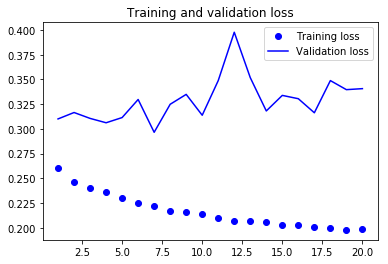

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))


model.compile(optimizer = RMSprop(), loss = 'mae')

model.fit_generator(train_gen, 
                    steps_per_epoch = 500, 
                    epochs = 20, 
                    validation_data = val_gen, 
                    validation_steps = 500)

Epoch 1/20
500/500 [==============================] - 97s 194ms/step - loss: 0.3054 - val_loss: 0.2627
Epoch 2/20
500/500 [==============================] - 96s 193ms/step - loss: 0.2826 - val_loss: 0.2703
Epoch 3/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2773 - val_loss: 0.2727
Epoch 4/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2711 - val_loss: 0.2597
Epoch 5/20
500/500 [==============================] - 97s 195ms/step - loss: 0.2656 - val_loss: 0.2697
Epoch 6/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2596 - val_loss: 0.2668
Epoch 7/20
500/500 [==============================] - 99s 197ms/step - loss: 0.2562 - val_loss: 0.2651
Epoch 8/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2499 - val_loss: 0.2756
Epoch 9/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2442 - val_loss: 0.2743
Epoch 10/20
500/500 [==============================] - 97s 193ms/step - l

In [17]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2, 
                     recurrent_dropout=0.2, 
                     input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))


model.compile(optimizer = RMSprop(), loss = 'mae')

history = model.fit_generator(train_gen, 
                    steps_per_epoch = 500, 
                    epochs = 40, 
                    validation_data = val_gen, 
                    validation_steps = 500)

Epoch 1/40
500/500 [==============================] - 112s 224ms/step - loss: 0.3410 - val_loss: 0.2666
Epoch 2/40
475/500 [===========================>..] - ETA: 4s - loss: 0.3160

KeyboardInterrupt: 